# Import packages

In [350]:
!pip install mlflow tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')

import mlflow
import mlflow.tensorflow
mlflow.tensorflow.autolog()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2015 Data EDA

Import data for one month of NYC Taxi and Limousine Commison (TLC)

January 2025 TLC file

In [351]:
eda_ddf = dd.read_parquet(['/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet'])
eda_df = eda_ddf.compute()
eda_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,1.50,2.75,0.0,0.0,15.71,N,N,N,N,N
1,HV0005,B03406,<NA>,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,1.51,0.00,0.0,0.0,23.57,N,N,N,N,N
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,3.80,0.00,2.5,0.0,47.75,N,N,N,N,N
3,HV0003,B03404,B03404,2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.820,...,1.08,0.00,0.0,0.0,12.20,N,N,N,N,N
4,HV0003,B03404,B03404,2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.610,...,1.76,0.00,0.0,0.0,17.67,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628445,HV0003,B03404,B03404,2025-01-31 23:45:39,2025-01-31 23:51:13,2025-01-31 23:51:52,2025-01-31 23:55:59,45,148,0.470,...,2.49,2.75,0.0,0.0,17.66,N,N,N,N,N
3628446,HV0003,B03404,B03404,2025-01-31 23:06:19,2025-01-31 23:08:27,2025-01-31 23:10:28,2025-01-31 23:29:36,235,242,6.360,...,1.55,0.00,0.0,0.0,19.80,N,N,N,N,N
3628447,HV0003,B03404,B03404,2025-01-31 23:25:48,2025-01-31 23:30:47,2025-01-31 23:31:24,2025-01-31 23:48:23,242,235,5.280,...,1.68,0.00,0.0,0.0,17.08,N,N,N,N,N
3628448,HV0003,B03404,B03404,2025-01-31 23:48:59,2025-01-31 23:55:45,2025-01-31 23:57:06,2025-02-01 00:04:35,235,235,0.830,...,1.04,0.00,0.0,1.0,6.79,N,N,N,N,N


In [352]:
eda_df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

Reduce the row count from 20 million to 1 million

In [353]:
mini_eda_df= eda_df.sample(frac=.05, random_state=42)
mini_eda_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
2707637,HV0003,B03404,B03404,2025-01-05 11:33:26,2025-01-05 11:33:39,2025-01-05 11:34:58,2025-01-05 11:54:18,163,144,3.450,...,2.56,2.75,0.0,0.00,15.96,N,N,N,N,N
1762921,HV0003,B03404,B03404,2025-01-16 22:52:08,2025-01-16 22:55:45,2025-01-16 22:55:59,2025-01-16 23:33:40,155,265,19.010,...,4.72,0.00,0.0,4.00,50.22,N,N,N,N,N
3943151,HV0003,B03404,B03404,2025-01-19 23:09:59,2025-01-19 23:27:05,2025-01-19 23:28:09,2025-01-19 23:41:19,106,14,5.950,...,1.66,0.00,0.0,4.18,16.92,N,N,N,N,N
6097672,HV0005,B03406,<NA>,2025-01-23 10:50:08,NaT,2025-01-23 10:53:50,2025-01-23 11:10:11,180,95,3.467,...,1.58,0.00,0.0,0.00,15.64,N,N,N,N,Y
3332466,HV0005,B03406,<NA>,2025-01-19 01:35:56,NaT,2025-01-19 01:44:22,2025-01-19 01:47:21,91,72,0.508,...,0.71,0.00,0.0,0.00,5.47,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036411,HV0003,B03404,B03404,2025-01-09 08:00:19,2025-01-09 08:05:19,2025-01-09 08:05:37,2025-01-09 08:16:15,136,94,1.380,...,1.11,0.00,0.0,0.00,10.63,N,N,N,N,N
4331130,HV0005,B03406,<NA>,2025-01-08 07:14:40,NaT,2025-01-08 07:16:25,2025-01-08 07:26:24,246,230,1.414,...,1.01,2.75,0.0,0.00,7.78,N,N,N,N,N
1816595,HV0003,B03404,B03404,2025-01-04 00:45:25,2025-01-04 00:49:12,2025-01-04 00:51:14,2025-01-04 01:10:45,35,132,5.970,...,1.81,0.00,0.0,0.00,23.50,N,N,N,N,Y
3230322,HV0003,B03404,B03404,2025-01-18 22:41:55,2025-01-18 22:44:22,2025-01-18 22:44:42,2025-01-18 22:58:43,229,238,2.780,...,1.19,2.75,0.0,0.00,12.12,N,N,N,N,N


Import table containg taxi zones corresponding to LocationID and Borough

In [354]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zone_lookup.csv')
zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


Merge TLC table with taxi zone table to include borough

In [355]:
pickup = zone_lookup[['Borough', 'LocationID']].copy()
pickup.columns= ['pickup_borough','PULocationID',]
dropoff = zone_lookup[['Borough', 'LocationID']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID',]
df_merged = pd.merge(
            eda_df,
            pickup,
            on = 'PULocationID',
            how = 'left'
)

df_merged = pd.merge(
            df_merged,
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)
df_merged

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_borough,dropoff_borough
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,0.0,0.0,15.71,N,N,N,N,N,Manhattan,Manhattan
1,HV0005,B03406,<NA>,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,0.0,0.0,23.57,N,N,N,N,N,Manhattan,Manhattan
2,HV0003,B03404,B03404,2025-01-01 00:28:22,2025-01-01 00:31:52,2025-01-01 00:32:39,2025-01-01 01:20:33,132,181,13.430,...,2.5,0.0,47.75,N,N,N,N,N,Queens,Brooklyn
3,HV0003,B03404,B03404,2025-01-01 00:27:13,2025-01-01 00:33:58,2025-01-01 00:34:55,2025-01-01 00:39:19,76,76,0.820,...,0.0,0.0,12.20,N,N,N,N,N,Brooklyn,Brooklyn
4,HV0003,B03404,B03404,2025-01-01 00:33:29,2025-01-01 00:45:46,2025-01-01 00:46:19,2025-01-01 00:53:56,76,76,1.610,...,0.0,0.0,17.67,N,N,N,N,N,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405661,HV0003,B03404,B03404,2025-01-31 23:45:39,2025-01-31 23:51:13,2025-01-31 23:51:52,2025-01-31 23:55:59,45,148,0.470,...,0.0,0.0,17.66,N,N,N,N,N,Manhattan,Manhattan
20405662,HV0003,B03404,B03404,2025-01-31 23:06:19,2025-01-31 23:08:27,2025-01-31 23:10:28,2025-01-31 23:29:36,235,242,6.360,...,0.0,0.0,19.80,N,N,N,N,N,Bronx,Bronx
20405663,HV0003,B03404,B03404,2025-01-31 23:25:48,2025-01-31 23:30:47,2025-01-31 23:31:24,2025-01-31 23:48:23,242,235,5.280,...,0.0,0.0,17.08,N,N,N,N,N,Bronx,Bronx
20405664,HV0003,B03404,B03404,2025-01-31 23:48:59,2025-01-31 23:55:45,2025-01-31 23:57:06,2025-02-01 00:04:35,235,235,0.830,...,0.0,1.0,6.79,N,N,N,N,N,Bronx,Bronx


Filter for only Manhattan pickup and dropoff locations

In [356]:
manhattan_df = df_merged[(df_merged['pickup_borough'] == 'Manhattan') & (df_merged['dropoff_borough'] == 'Manhattan')].drop(columns=['pickup_borough','dropoff_borough'],axis=1)
manhattan_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.320,...,1.50,2.75,0.0,0.00,15.71,N,N,N,N,N
1,HV0005,B03406,<NA>,2025-01-01 00:18:33,NaT,2025-01-01 00:29:49,2025-01-01 00:41:52,127,244,3.313,...,1.51,0.00,0.0,0.00,23.57,N,N,N,N,N
8,HV0005,B03406,<NA>,2025-01-01 00:10:48,NaT,2025-01-01 00:12:35,2025-01-01 00:51:37,234,41,7.254,...,2.86,2.75,0.0,0.00,35.74,N,N,N,N,N
10,HV0005,B03406,<NA>,2025-01-01 00:02:47,NaT,2025-01-01 00:06:32,2025-01-01 00:17:04,141,239,2.095,...,1.11,2.75,0.0,3.36,13.02,N,N,N,N,N
11,HV0005,B03406,<NA>,2025-01-01 00:10:09,NaT,2025-01-01 00:19:16,2025-01-01 00:28:49,239,166,2.876,...,1.05,2.75,0.0,0.00,13.01,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405653,HV0003,B03404,B03404,2025-01-31 23:41:20,2025-01-31 23:44:35,2025-01-31 23:45:11,2025-01-31 23:57:52,243,243,1.370,...,0.78,0.00,0.0,0.00,9.25,N,N,N,N,N
20405658,HV0003,B03404,B03404,2025-01-31 23:11:26,2025-01-31 23:12:17,2025-01-31 23:13:46,2025-01-31 23:20:56,249,79,0.720,...,2.40,2.75,0.0,3.29,12.92,N,N,N,N,N
20405659,HV0003,B03404,B03404,2025-01-31 23:24:02,2025-01-31 23:25:37,2025-01-31 23:26:04,2025-01-31 23:32:12,114,113,0.800,...,1.85,2.75,0.0,0.00,10.72,N,N,N,N,N
20405660,HV0003,B03404,B03404,2025-01-31 23:40:08,2025-01-31 23:41:09,2025-01-31 23:42:21,2025-01-31 23:48:20,114,144,0.630,...,2.61,2.75,0.0,0.00,16.64,N,N,N,N,N


Remove base fares equal to zero

In [357]:
manhattan_df_2 = manhattan_df[manhattan_df['base_passenger_fare'] != 0]

In [358]:
pricing_df_all =manhattan_df_2['base_passenger_fare'].sort_values(ascending=False)

<Axes: xlabel='base_passenger_fare', ylabel='trip_miles'>

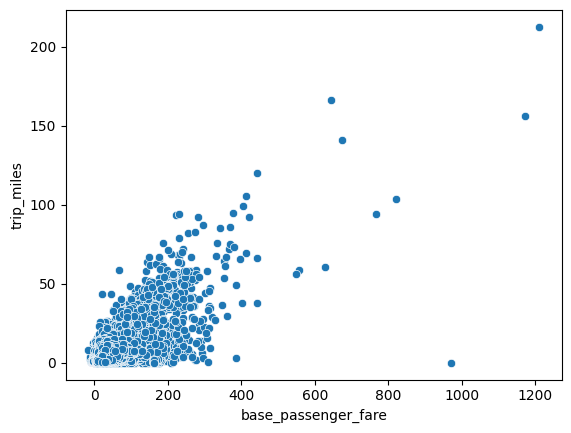

In [359]:
sns.scatterplot(data=manhattan_df_2, x = 'base_passenger_fare', y= 'trip_miles')

In [360]:
pricing_df_all_2 = pricing_df_all[(pricing_df_all > 0 ) & (pricing_df_all < 8)]

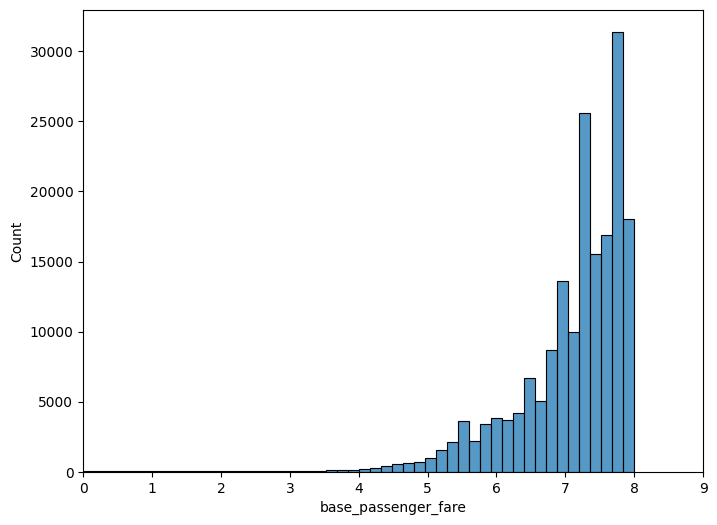

In [425]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all_2, bins=50)

plt.xlim(0,9)
plt.show()

Drop all rows less than 5 and greater than 120

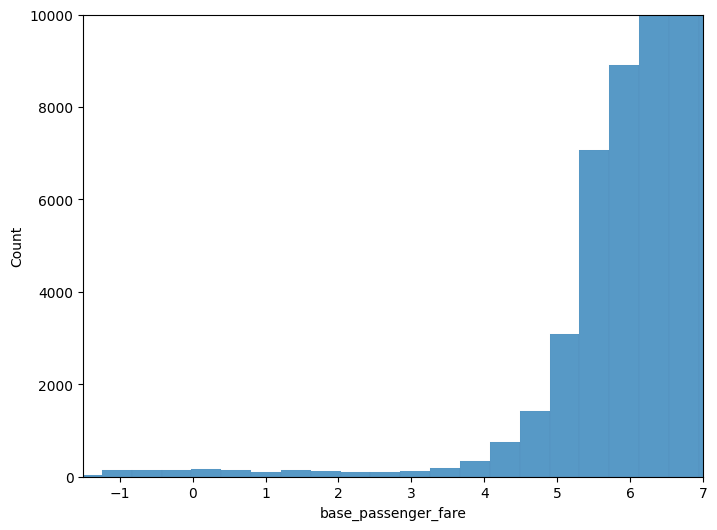

In [424]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=3000)

plt.xlim(-1.5,7)
plt.ylim(0,10000)
plt.show()

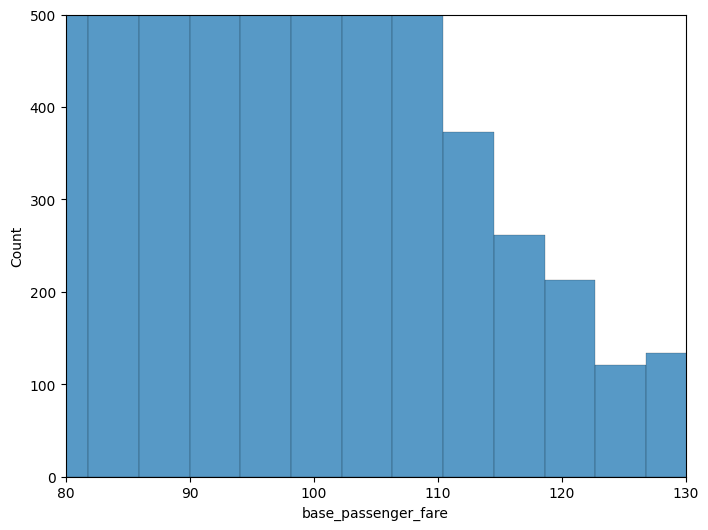

In [364]:
plt.figure(figsize=(8,6))
sns.histplot(pricing_df_all, bins=300)

plt.xlim(80,130)
plt.ylim(0,500)
plt.show()

In [365]:
manhattan_df_3 = manhattan_df_2[(manhattan_df_2['base_passenger_fare'] > 5) & (manhattan_df_2['base_passenger_fare'] < 120)]

In [366]:
manhattan_df_3['base_passenger_fare'].describe()

,base_passenger_fare
count,5.505321e+06
mean,2.023235e+01
std,1.121046e+01
min,5.010000e+00
25%,1.217000e+01
50%,1.737000e+01
75%,2.522000e+01
max,1.199800e+02


Remove rows that where the base fare is over 100 and the pickup and dropoff location is the same

In [367]:
manhattan_df_4 = manhattan_df_3[(manhattan_df_3['base_passenger_fare'] <100) & (manhattan_df_3['PULocationID'] != manhattan_df_3['DOLocationID'])]

In [368]:
manhattan_df_4.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [369]:
manhattan_df_4.isna().sum()

,0
hvfhs_license_num,0
dispatching_base_num,0
originating_base_num,1447884
request_datetime,0
on_scene_datetime,1447884
pickup_datetime,0
dropoff_datetime,0
PULocationID,0
DOLocationID,0
trip_miles,0


In [370]:
manhattan_df_4.dropna()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.32,...,1.50,2.75,0.0,0.00,15.71,N,N,N,N,N
26,HV0003,B03404,B03404,2025-01-01 00:18:33,2025-01-01 00:22:39,2025-01-01 00:23:47,2025-01-01 00:42:24,229,114,4.28,...,3.90,2.75,0.0,7.78,30.37,N,N,N,N,N
27,HV0003,B03404,B03404,2025-01-01 00:38:50,2025-01-01 00:47:19,2025-01-01 00:48:32,2025-01-01 00:59:51,249,211,1.07,...,2.15,2.75,0.0,0.00,19.17,N,N,N,N,N
28,HV0003,B03404,B03404,2025-01-01 00:01:51,2025-01-01 00:03:23,2025-01-01 00:04:36,2025-01-01 00:16:23,141,41,2.72,...,1.46,2.75,0.0,0.00,15.71,N,N,N,N,N
29,HV0003,B03404,B03404,2025-01-01 00:15:03,2025-01-01 00:18:51,2025-01-01 00:20:39,2025-01-01 00:34:00,41,238,2.29,...,1.18,2.75,0.0,1.00,16.03,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405645,HV0003,B03404,B03404,2025-01-31 23:41:32,2025-01-31 23:46:08,2025-01-31 23:47:49,2025-02-01 00:00:16,237,232,4.50,...,2.00,2.75,0.0,0.00,13.38,N,N,N,N,N
20405658,HV0003,B03404,B03404,2025-01-31 23:11:26,2025-01-31 23:12:17,2025-01-31 23:13:46,2025-01-31 23:20:56,249,79,0.72,...,2.40,2.75,0.0,3.29,12.92,N,N,N,N,N
20405659,HV0003,B03404,B03404,2025-01-31 23:24:02,2025-01-31 23:25:37,2025-01-31 23:26:04,2025-01-31 23:32:12,114,113,0.80,...,1.85,2.75,0.0,0.00,10.72,N,N,N,N,N
20405660,HV0003,B03404,B03404,2025-01-31 23:40:08,2025-01-31 23:41:09,2025-01-31 23:42:21,2025-01-31 23:48:20,114,144,0.63,...,2.61,2.75,0.0,0.00,16.64,N,N,N,N,N


Filter for 'HV0003' in hvfhs_license_num column as this is the desingated code for Ubers

In [371]:
manhattan_df_4['hvfhs_license_num'].value_counts()

,count
hvfhs_license_num,
HV0003,3819818
HV0005,1451460


In [372]:
temp_df_1 = manhattan_df_4.loc[manhattan_df_4['hvfhs_license_num']=='HV0003']

Filter out shared rides where the request was both requested and fufilled as the price is the same for both

In [374]:
ddf_temp_2 = temp_df_1[(temp_df_1['shared_match_flag'] == 'N')& (temp_df_1['shared_request_flag'] == 'N')]
ddf_temp_2.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.32,...,1.50,2.75,0.0,0.00,15.71,N,N,N,N,N
26,HV0003,B03404,B03404,2025-01-01 00:18:33,2025-01-01 00:22:39,2025-01-01 00:23:47,2025-01-01 00:42:24,229,114,4.28,...,3.90,2.75,0.0,7.78,30.37,N,N,N,N,N
27,HV0003,B03404,B03404,2025-01-01 00:38:50,2025-01-01 00:47:19,2025-01-01 00:48:32,2025-01-01 00:59:51,249,211,1.07,...,2.15,2.75,0.0,0.00,19.17,N,N,N,N,N
28,HV0003,B03404,B03404,2025-01-01 00:01:51,2025-01-01 00:03:23,2025-01-01 00:04:36,2025-01-01 00:16:23,141,41,2.72,...,1.46,2.75,0.0,0.00,15.71,N,N,N,N,N
29,HV0003,B03404,B03404,2025-01-01 00:15:03,2025-01-01 00:18:51,2025-01-01 00:20:39,2025-01-01 00:34:00,41,238,2.29,...,1.18,2.75,0.0,1.00,16.03,N,N,N,N,N


In [375]:
ddf_temp_3 = ddf_temp_2.drop(columns=['shared_match_flag','shared_request_flag'])
ddf_temp_3.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.32,...,0.0,0.46,1.50,2.75,0.0,0.00,15.71,N,N,N
26,HV0003,B03404,B03404,2025-01-01 00:18:33,2025-01-01 00:22:39,2025-01-01 00:23:47,2025-01-01 00:42:24,229,114,4.28,...,0.0,1.21,3.90,2.75,0.0,7.78,30.37,N,N,N
27,HV0003,B03404,B03404,2025-01-01 00:38:50,2025-01-01 00:47:19,2025-01-01 00:48:32,2025-01-01 00:59:51,249,211,1.07,...,0.0,0.66,2.15,2.75,0.0,0.00,19.17,N,N,N
28,HV0003,B03404,B03404,2025-01-01 00:01:51,2025-01-01 00:03:23,2025-01-01 00:04:36,2025-01-01 00:16:23,141,41,2.72,...,0.0,0.45,1.46,2.75,0.0,0.00,15.71,N,N,N
29,HV0003,B03404,B03404,2025-01-01 00:15:03,2025-01-01 00:18:51,2025-01-01 00:20:39,2025-01-01 00:34:00,41,238,2.29,...,0.0,0.36,1.18,2.75,0.0,1.00,16.03,N,N,N


Analyzing the access_a_ride_flag column which is Uber users who have thier rides subsidized by the MTA

In [376]:
ddf_temp_3['access_a_ride_flag'].value_counts()

,count
access_a_ride_flag,
N,3693315
Y,2283


The subsidized fare is about $2.50 so the base fare incldued here is the total price paid to Uber

In [377]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['base_passenger_fare'].median()

25.0

In [378]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'Y']['trip_miles'].median()

3.23

In [379]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['base_passenger_fare'].median()

18.81

In [380]:
ddf_temp_3[ddf_temp_3['access_a_ride_flag'] == 'N']['trip_miles'].median()

1.91

In [381]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

,base_passenger_fare
count,509.000000
mean,15.527642
std,6.751434
min,5.570000
25%,11.270000
50%,13.560000
75%,18.060000
max,51.600000


In [382]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N') & (ddf_temp_3['trip_miles']  < 2)& (ddf_temp_3['trip_miles']  > 1)]['base_passenger_fare'].describe()

,base_passenger_fare
count,1.403330e+06
mean,1.680704e+01
std,7.426771e+00
min,5.010000e+00
25%,1.190000e+01
50%,1.491000e+01
75%,1.918000e+01
max,9.983000e+01


In [383]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'Y')]['PULocationID'].value_counts()[:10]

,count
PULocationID,
41,150
75,130
90,116
74,100
238,91
42,81
143,80
244,71
140,60


In [384]:
ddf_temp_3[(ddf_temp_3['access_a_ride_flag'] == 'N')]['PULocationID'].value_counts()[:10]

,count
PULocationID,
161,127493
230,118021
234,116287
79,115828
231,114310
246,114255
68,103707
249,97807
164,93927


The rides that are subsidized by the MTA may be important to keep as they provide addtional data and have about the same base fare

In [385]:
ddf_temp_3

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2025-01-01 00:28:07,2025-01-01 00:31:17,2025-01-01 00:33:25,2025-01-01 00:54:24,148,211,1.32,...,0.0,0.46,1.50,2.75,0.0,0.00,15.71,N,N,N
26,HV0003,B03404,B03404,2025-01-01 00:18:33,2025-01-01 00:22:39,2025-01-01 00:23:47,2025-01-01 00:42:24,229,114,4.28,...,0.0,1.21,3.90,2.75,0.0,7.78,30.37,N,N,N
27,HV0003,B03404,B03404,2025-01-01 00:38:50,2025-01-01 00:47:19,2025-01-01 00:48:32,2025-01-01 00:59:51,249,211,1.07,...,0.0,0.66,2.15,2.75,0.0,0.00,19.17,N,N,N
28,HV0003,B03404,B03404,2025-01-01 00:01:51,2025-01-01 00:03:23,2025-01-01 00:04:36,2025-01-01 00:16:23,141,41,2.72,...,0.0,0.45,1.46,2.75,0.0,0.00,15.71,N,N,N
29,HV0003,B03404,B03404,2025-01-01 00:15:03,2025-01-01 00:18:51,2025-01-01 00:20:39,2025-01-01 00:34:00,41,238,2.29,...,0.0,0.36,1.18,2.75,0.0,1.00,16.03,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405645,HV0003,B03404,B03404,2025-01-31 23:41:32,2025-01-31 23:46:08,2025-01-31 23:47:49,2025-02-01 00:00:16,237,232,4.50,...,0.0,0.57,2.00,2.75,0.0,0.00,13.38,N,N,N
20405658,HV0003,B03404,B03404,2025-01-31 23:11:26,2025-01-31 23:12:17,2025-01-31 23:13:46,2025-01-31 23:20:56,249,79,0.72,...,0.0,0.70,2.40,2.75,0.0,3.29,12.92,N,N,N
20405659,HV0003,B03404,B03404,2025-01-31 23:24:02,2025-01-31 23:25:37,2025-01-31 23:26:04,2025-01-31 23:32:12,114,113,0.80,...,0.0,0.53,1.85,2.75,0.0,0.00,10.72,N,N,N
20405660,HV0003,B03404,B03404,2025-01-31 23:40:08,2025-01-31 23:41:09,2025-01-31 23:42:21,2025-01-31 23:48:20,114,144,0.63,...,0.0,0.77,2.61,2.75,0.0,0.00,16.64,N,N,N


In [386]:
ddf_temp_3['wav_request_flag'].value_counts()

,count
wav_request_flag,
N,3685578
Y,10020


In [387]:
ddf_temp_3['wav_match_flag'].value_counts()

,count
wav_match_flag,
N,3244334
Y,451264


Keep both wav_request_flag features

In [388]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'Y']['base_passenger_fare'].median()

17.81

In [389]:
ddf_temp_3[ddf_temp_3['wav_request_flag'] == 'N']['base_passenger_fare'].median()

18.81

In [390]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'Y']['base_passenger_fare'].median()

17.35

In [391]:
ddf_temp_3[ddf_temp_3['wav_match_flag'] == 'N']['base_passenger_fare'].median()

19.0

In [392]:
ddf_temp_3.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,3695598,3695598,3695598,3695598,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3.695598e+06,3695598.0,3.695598e+06,3.695598e+06
mean,2025-01-17 04:34:52.990624,2025-01-17 04:37:35.724060,2025-01-17 04:38:38.051577,2025-01-17 04:52:57.176569,1.587457e+02,1.593876e+02,2.575945e+00,8.591256e+02,2.171657e+01,1.445714e-02,5.692252e-01,1.931506e+00,2.518525e+00,0.0,1.089549e+00,1.397654e+01
min,2024-12-31 23:02:17,2024-12-31 23:50:35,2025-01-01 00:00:01,2025-01-01 00:03:56,4.000000e+00,4.000000e+00,0.000000e+00,1.600000e+01,5.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-6.940000e+00
25%,2025-01-09 21:24:54.250000,2025-01-09 21:27:35.500000,2025-01-09 21:28:39,2025-01-09 21:42:16,1.070000e+02,1.070000e+02,1.250000e+00,5.330000e+02,1.313000e+01,0.000000e+00,3.300000e-01,1.150000e+00,2.750000e+00,0.0,0.000000e+00,8.230000e+00
50%,2025-01-17 09:14:55.500000,2025-01-17 09:17:02.500000,2025-01-17 09:18:02,2025-01-17 09:33:21.500000,1.610000e+02,1.610000e+02,1.910000e+00,7.720000e+02,1.881000e+01,0.000000e+00,4.900000e-01,1.670000e+00,2.750000e+00,0.0,0.000000e+00,1.208000e+01
75%,2025-01-24 18:30:28.750000,2025-01-24 18:34:12,2025-01-24 18:35:09,2025-01-24 18:50:48,2.320000e+02,2.320000e+02,3.180000e+00,1.098000e+03,2.713000e+01,0.000000e+00,7.200000e-01,2.420000e+00,2.750000e+00,0.0,0.000000e+00,1.778000e+01
max,2025-01-31 23:58:30,2025-01-31 23:59:52,2025-01-31 23:59:59,2025-02-01 00:52:14,2.630000e+02,2.630000e+02,5.868000e+01,8.685000e+03,9.999000e+01,5.824000e+01,3.100000e+00,1.210000e+01,2.750000e+00,0.0,8.000000e+01,1.727700e+02
std,NaN,NaN,NaN,NaN,7.038690e+01,6.985084e+01,1.981898e+00,4.399246e+02,1.177638e+01,4.296657e-01,3.270781e-01,1.068378e+00,7.633577e-01,0.0,2.380982e+00,7.797975e+00


In [393]:
ddf_temp_3['tolls'].sort_values(ascending=False)[:20]

,tolls
3472936,58.24
18544184,40.72
1866505,40.00
92356,40.00
2195422,40.00
12464293,34.80
19234799,33.26
19618577,32.58
13644821,32.56
5177016,32.13


In [394]:
tolls_df = ddf_temp_3[ddf_temp_3['tolls'] > 0]

In [395]:
tolls_df['PULocationID'].value_counts()

,count
PULocationID,
194,912
202,827
74,503
137,281
42,215
...,...
128,10
120,9
88,9


In [396]:
tolls_df['DOLocationID'].value_counts()

,count
DOLocationID,
194,1865
202,1056
137,231
153,193
74,165
...,...
88,8
45,6
12,5


In [397]:
toll_42_df = tolls_df[tolls_df['PULocationID'] == 42]

In [398]:
toll_42_df['DOLocationID'].value_counts()

,count
DOLocationID,
194,126
202,60
137,9
74,3
144,2
244,2
140,1
170,1
186,1


In [399]:
tolls_df_test = ddf_temp_3[(ddf_temp_3['PULocationID'] == 232) & (ddf_temp_3['DOLocationID'] == 42)]

In [400]:
tolls_df_test[tolls_df_test['tolls'] > 0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag
2409,HV0003,B03404,B03404,2025-01-01 00:43:10,2025-01-01 00:52:02,2025-01-01 00:52:30,2025-01-01 01:26:04,232,42,13.58,...,6.94,1.23,4.54,2.75,0.0,0.0,48.61,N,N,N
10644,HV0003,B03404,B03404,2025-01-01 00:43:07,2025-01-01 00:54:30,2025-01-01 00:56:34,2025-01-01 01:27:57,232,42,13.55,...,6.94,1.46,5.34,2.75,0.0,0.0,48.28,N,N,N
16407316,HV0003,B03404,B03404,2025-01-25 21:09:24,2025-01-25 21:12:43,2025-01-25 21:14:15,2025-01-25 22:37:10,232,42,33.75,...,6.94,2.45,8.64,2.75,0.0,0.0,94.81,N,N,N
16476982,HV0003,B03404,B03404,2025-01-25 23:05:59,2025-01-25 23:34:38,2025-01-25 23:35:15,2025-01-26 00:02:28,232,42,12.78,...,6.94,1.03,4.07,2.75,0.0,0.0,38.25,N,N,N
16483825,HV0003,B03404,B03404,2025-01-25 23:31:58,2025-01-25 23:48:24,2025-01-25 23:50:25,2025-01-26 00:19:04,232,42,13.38,...,6.94,1.28,4.88,2.75,0.0,0.0,46.91,N,N,Y


In [402]:
ddf_temp_3['trip_miles'].sort_values(ascending=False)

,trip_miles
3472936,58.68
17693273,40.30
1069663,40.20
18544184,40.16
2571143,36.13
...,...
11873343,0.00
9718906,0.00
6286448,0.00
15768491,0.00


<Axes: xlabel='trip_miles', ylabel='trip_time'>

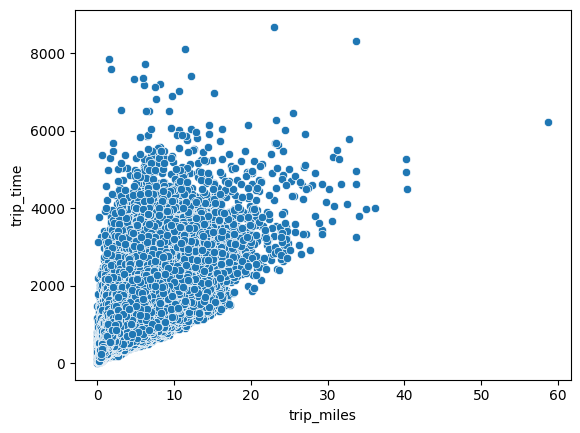

In [403]:
sns.scatterplot(data=ddf_temp_3, x = 'trip_miles', y = 'trip_time')

In [404]:
ddf_temp_4 = ddf_temp_3[((ddf_temp_3['trip_time'] < 8000) | (ddf_temp_3['trip_miles'] < 50))  & (ddf_temp_3['trip_miles'] < 50) ]

<Axes: xlabel='trip_miles', ylabel='trip_time'>

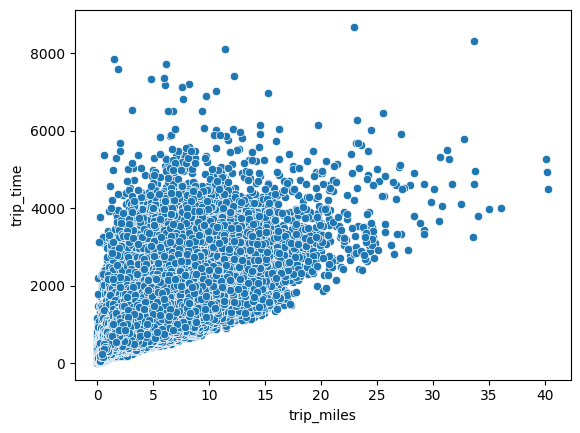

In [405]:
sns.scatterplot(data=ddf_temp_4, x = 'trip_miles', y = 'trip_time')

In [406]:
ddf_temp_3 = ddf_temp_3[ddf_temp_3['trip_miles'] < 38]

In [407]:
ddf_temp_3 = ddf_temp_3[ddf_temp_3['trip_time'] < 8000]

<Axes: xlabel='trip_miles', ylabel='trip_time'>

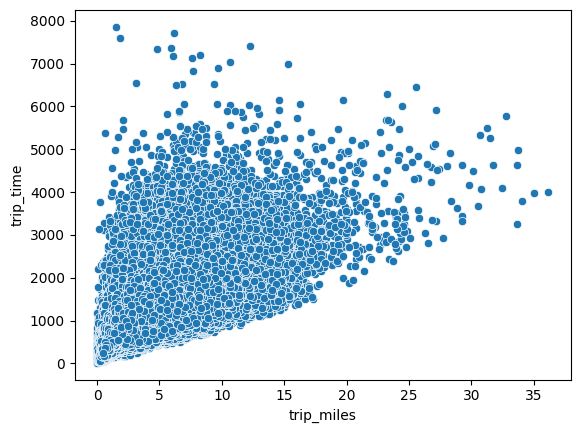

In [408]:
sns.scatterplot(data=ddf_temp_3, x = 'trip_miles', y = 'trip_time')

In [409]:
ddf_temp_3[['bcf', 'base_passenger_fare']]

,bcf,base_passenger_fare
0,0.46,18.21
26,1.21,44.03
27,0.66,24.14
28,0.45,16.50
29,0.36,13.30
...,...,...
20405645,0.57,21.24
20405658,0.70,27.11
20405659,0.53,20.89
20405660,0.77,31.78


In [410]:
ddf_temp_3['bcf_percentage'] = ddf_temp_3['bcf'] / ddf_temp_3['base_passenger_fare']

In [411]:
ddf_temp_3[['bcf', 'base_passenger_fare' , 'bcf_percentage']]

,bcf,base_passenger_fare,bcf_percentage
0,0.46,18.21,0.025261
26,1.21,44.03,0.027481
27,0.66,24.14,0.027341
28,0.45,16.50,0.027273
29,0.36,13.30,0.027068
...,...,...,...
20405645,0.57,21.24,0.026836
20405658,0.70,27.11,0.025821
20405659,0.53,20.89,0.025371
20405660,0.77,31.78,0.024229


In [413]:
ddf_temp_3[ddf_temp_3['bcf_percentage'] < .005]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag,bcf_percentage
28618,HV0003,B03404,B03404,2025-01-01 00:44:03,2025-01-01 00:48:25,2025-01-01 00:49:06,2025-01-01 00:53:57,249,90,0.62,...,0.00,0.00,2.75,0.0,0.0,29.60,N,N,N,0.000000
40898,HV0003,B03404,B03404,2025-01-01 00:13:58,2025-01-01 00:15:29,2025-01-01 00:16:41,2025-01-01 00:23:31,231,249,1.32,...,0.00,0.00,2.75,0.0,0.0,11.83,N,N,N,0.000000
63622,HV0003,B03404,B03404,2025-01-01 01:12:30,2025-01-01 01:19:35,2025-01-01 01:21:24,2025-01-01 01:33:43,79,137,1.52,...,0.00,0.00,2.75,0.0,0.0,37.94,N,N,N,0.000000
90935,HV0003,B03404,B03404,2025-01-01 01:06:38,2025-01-01 01:15:03,2025-01-01 01:17:05,2025-01-01 01:37:06,116,127,4.21,...,0.02,0.05,0.00,0.0,0.0,30.99,N,N,N,0.000639
133073,HV0003,B03404,B03404,2025-01-01 02:22:53,2025-01-01 02:25:48,2025-01-01 02:27:50,2025-01-01 02:41:02,232,114,1.96,...,0.07,0.22,2.75,0.0,0.0,42.95,N,N,Y,0.001376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20402176,HV0003,B03404,B03404,2025-01-31 23:20:24,2025-01-31 23:28:16,2025-01-31 23:28:16,2025-01-31 23:34:38,234,186,0.95,...,0.03,0.10,2.75,0.0,0.0,5.38,N,N,Y,0.002844
20402763,HV0003,B03404,B03404,2025-01-31 23:02:49,2025-01-31 23:06:06,2025-01-31 23:06:48,2025-01-31 23:16:19,164,233,1.08,...,0.02,0.07,2.75,0.0,0.0,7.02,N,N,N,0.002427
20403367,HV0003,B03404,B03404,2025-01-31 23:08:10,2025-01-31 23:11:39,2025-01-31 23:13:39,2025-01-31 23:21:30,90,158,1.17,...,0.02,0.07,2.75,0.0,0.0,6.16,N,N,N,0.001664
20405058,HV0003,B03404,B03404,2025-01-31 23:21:54,2025-01-31 23:30:53,2025-01-31 23:31:39,2025-01-31 23:44:27,249,234,1.79,...,0.05,0.19,2.75,0.0,0.0,11.02,N,N,Y,0.002992


In [414]:
#NOTE:The BCF's surcharge rate decreased from 2.75% to 2.5% effective February 1, 2025.

In [415]:
ddf_temp_3['sales_tax_percentage'] = ddf_temp_3['sales_tax'] / ddf_temp_3['base_passenger_fare']

In [416]:
ddf_temp_3[['sales_tax', 'base_passenger_fare' , 'sales_tax_percentage']]

,sales_tax,base_passenger_fare,sales_tax_percentage
0,1.50,18.21,0.082372
26,3.90,44.03,0.088576
27,2.15,24.14,0.089064
28,1.46,16.50,0.088485
29,1.18,13.30,0.088722
...,...,...,...
20405645,2.00,21.24,0.094162
20405658,2.40,27.11,0.088528
20405659,1.85,20.89,0.088559
20405660,2.61,31.78,0.082127


In [417]:
ddf_temp_3[ddf_temp_3['sales_tax_percentage'] > .2]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,access_a_ride_flag,wav_request_flag,wav_match_flag,bcf_percentage,sales_tax_percentage
172752,HV0003,B03404,B03404,2025-01-01 02:48:33,2025-01-01 02:52:16,2025-01-01 02:57:17,2025-01-01 03:07:53,211,79,0.83,...,3.00,2.75,0.0,8.09,25.50,N,N,N,0.071649,0.231125
515227,HV0003,B03404,B03404,2025-01-01 17:45:42,2025-01-01 17:49:00,2025-01-01 17:49:58,2025-01-01 18:13:28,163,244,11.38,...,3.07,2.75,0.0,0.00,31.44,N,N,N,0.045952,0.223924
805895,HV0003,B03404,B03404,2025-01-02 08:59:15,2025-01-02 09:04:30,2025-01-02 09:04:47,2025-01-02 09:28:04,141,42,5.00,...,5.90,2.75,0.0,0.00,24.17,N,Y,Y,0.069213,0.223147
845826,HV0003,B03404,B03404,2025-01-02 11:15:22,2025-01-02 11:15:38,2025-01-02 11:17:39,2025-01-02 11:47:57,100,41,7.15,...,2.80,2.75,0.0,0.00,27.38,N,N,N,0.068884,0.221694
883058,HV0003,B03404,B03404,2025-01-02 12:33:16,2025-01-02 12:36:07,2025-01-02 12:42:39,2025-01-02 12:56:07,236,75,1.77,...,4.77,2.75,0.0,0.00,12.75,N,Y,Y,0.106551,0.343413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935671,HV0003,B03404,B03404,2025-01-31 12:18:45,2025-01-31 12:20:59,2025-01-31 12:27:30,2025-01-31 12:36:55,140,237,0.88,...,4.52,2.75,0.0,0.00,8.45,N,Y,Y,0.127157,0.410536
19971424,HV0003,B03404,B03404,2025-01-31 13:30:07,2025-01-31 13:34:25,2025-01-31 13:37:25,2025-01-31 13:54:49,74,42,3.28,...,5.19,0.00,0.0,0.00,16.28,N,Y,Y,0.086746,0.279634
20176264,HV0003,B03404,B03404,2025-01-31 18:50:00,2025-01-31 18:34:03,2025-01-31 18:40:35,2025-01-31 19:07:44,170,41,5.09,...,5.88,2.75,0.0,0.00,26.25,N,Y,Y,0.067861,0.224171
20361352,HV0003,B03404,B03404,2025-01-31 22:00:49,2025-01-31 22:02:21,2025-01-31 22:04:22,2025-01-31 22:37:49,79,246,8.78,...,3.59,2.75,0.0,0.00,31.45,N,N,N,0.045933,0.343541


# Prepare data for model

Upload a years worth of data of TLC paraquet files between Febuarary 2024 and January 2025

In [426]:
paths=['/content/drive/MyDrive/PHASE_5_PROJECT/Feb_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Mar_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Apr_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/May_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jun_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Jul_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Aug_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Sep_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Oct_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Nov_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/Dec_24.parquet',
                         '/content/drive/MyDrive/PHASE_5_PROJECT/U2025.parquet']
ddf_24 = dd.read_parquet(paths)

In [427]:
zone_lookup = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zone_lookup.csv')
zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [428]:
ddf_24['PULocationID'] = ddf_24['PULocationID'].astype('int64')
ddf_24['DOLocationID'] = ddf_24['DOLocationID'].astype('int64')
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype('int64')
pickup = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
pickup.columns= ['pickup_borough','PULocationID','pickup_zone']
dropoff = zone_lookup[['Borough', 'LocationID', 'Zone']].copy()
dropoff.columns =['dropoff_borough', 'DOLocationID','dropoff_zone']
merged_ddf = ddf_24.merge(
            pickup,
            on = 'PULocationID',
            how = 'left'
)

merged_ddf = merged_ddf.merge(
            dropoff,
            on = 'DOLocationID',
            how = 'left'
)


In [429]:
print(merged_ddf.columns)

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_borough', 'pickup_zone',
       'dropoff_borough', 'dropoff_zone'],
      dtype='object')


Replicate EDA completed above

In [430]:
ddf_manhattan = merged_ddf[(merged_ddf['pickup_borough'] == 'Manhattan') & (merged_ddf['dropoff_borough'] == 'Manhattan')]

In [431]:
ddf_manhattan_2 = ddf_manhattan.drop(columns=['pickup_borough', 'dropoff_borough'], axis=1)

In [432]:
ddf_manhattan_3 = ddf_manhattan_2[ddf_manhattan_2['base_passenger_fare'] != 0]

In [433]:
ddf_manhattan_4 = ddf_manhattan_3[(ddf_manhattan_3['base_passenger_fare'] >= 4)]

In [435]:
ddf_2024 = ddf_manhattan_4.loc[ddf_manhattan_4['hvfhs_license_num']=='HV0003']

In [436]:
ddf_temp = ddf_2024.loc[ddf_2024['shared_match_flag'] == 'N']

In [437]:
ddf_temp_2= ddf_temp.loc[ddf_temp['shared_request_flag'] == 'N']

In [438]:
ddf_temp_3 = ddf_temp_2.loc[(ddf_temp_2['PULocationID'] < 265) & (ddf_temp_2['DOLocationID'] < 265)]

In [439]:
ddf_temp_4 = ddf_temp_3.loc[ddf_temp_3['trip_miles'] < 38]

In [441]:
ddf_temp_5 = ddf_temp_4.loc[ddf_temp_3['trip_time'] < 3000]

In [442]:
ddf_temp_6 = ddf_temp_5[ddf_temp_5['base_passenger_fare']<140]

In [443]:
ddf_temp_7 = ddf_temp_6[~((ddf_temp_6['trip_time']>2400)& (ddf_temp_6['PULocationID'] == ddf_temp_6['DOLocationID']))]

In [444]:
excluded_zones = [103, 104, 105, 194, 202]

ddf_temp_7 = ddf_temp_6[(~ddf_temp_6['PULocationID'].isin(excluded_zones)) &
    (~ddf_temp_6['DOLocationID'].isin(excluded_zones))]

Roughly 180 million rows, need to sample

In [445]:
ddf_sam = ddf_temp_7.sample(frac=.03, random_state=42)

In [446]:
df_2024 = ddf_sam.compute()


In [447]:
df_2024.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'pickup_zone', 'dropoff_zone'],
      dtype='object')

In [448]:
df_24_Cl = df_2024.drop(columns=['hvfhs_license_num','dispatching_base_num','originating_base_num','shared_request_flag','shared_match_flag','access_a_ride_flag','wav_request_flag','wav_match_flag','tips','driver_pay'], axis =1)

In [449]:
df_24_Cl

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [451]:
mean_time = df_24_Cl['trip_time'].mean()
std_time = df_24_Cl['trip_time'].std()
cutoff = mean_time + 3 * std_time
print(cutoff)

2416.6703401687087


In [452]:
df_24_Cl['trip_time'].sort_values()

,trip_time
3006476,0
3290186,1
2257466,1
355510,3
145551,3
...,...
2477634,2999
2559297,2999
2098217,2999
922226,2999


In [467]:
df_24_Cl['sales_tax'].isna().sum()

np.int64(0)

In [458]:
#df_24_Cl['total_fare'] = (df_24_Cl['base_passenger_fare']) + (df_24_Cl['tolls']) + (df_24_Cl['bcf']) + (df_24_Cl['sales_tax']) + (df_24_Cl['congestion_surcharge'])+ (df_24_Cl['airport_fee'])

# 2009 Data EDA

In [468]:
early_uber = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/Uber_Fares_Dataset_Main.csv')
early_uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [38]:
#Data from all of NYC, Limit to Manhattan

In [39]:
def is_in_manhattan(lat, lon):
    return 40.70 <= lat <= 40.88 and -74.02 <= lon <= -73.92
selection = (
    early_uber['pickup_latitude'].between(40.70, 40.88) &
    early_uber['pickup_longitude'].between(-74.02, -73.92) &
    early_uber['dropoff_latitude'].between(40.70, 40.88) &
    early_uber['dropoff_longitude'].between(-74.02, -73.92)
)

early_uber = early_uber[selection]

In [40]:
early_uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27 UTC,-73.987798,40.721210,-73.980960,40.744388,1
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1


In [42]:
early_uber['pickup_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")

<ipython-input-42-244ed4b2da3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")


In [43]:
early_uber['dropoff_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")

<ipython-input-43-087247c76da3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['dropoff_datetime'] = early_uber['pickup_datetime'].str.replace(" UTC", "")


In [44]:
early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-44-f624cfa85048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [45]:
early_uber['dropoff_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-45-3d03f98e66f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['dropoff_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [47]:
early_uber.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
dropoff_datetime,0


In [48]:
early_uber_2 =early_uber[~((early_uber['pickup_longitude'] == early_uber['dropoff_longitude']) |
            (early_uber['pickup_latitude'] == early_uber['dropoff_latitude']))]

In [49]:
early_uber_2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00
...,...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27,-73.987798,40.721210,-73.980960,40.744388,1,2012-09-29 19:51:27
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00,-73.983070,40.760770,-73.972972,40.754177,1,2014-01-31 14:42:00
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00


In [50]:
geo_uber_df = early_uber_2[(early_uber_2['pickup_latitude'] != 0 )]

In [51]:
geo_uber_df_2 = early_uber[(early_uber['dropoff_latitude'] != 0 )]

In [52]:
geo_uber_df_3 = geo_uber_df_2[(geo_uber_df_2['pickup_latitude'] > 0)]

In [53]:
geo_uber_df_3

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00
...,...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27,-73.987798,40.721210,-73.980960,40.744388,1,2012-09-29 19:51:27
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00,-73.983070,40.760770,-73.972972,40.754177,1,2014-01-31 14:42:00
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00


In [55]:
len(geo_uber_df_3[(geo_uber_df_3['dropoff_latitude'] < 40.787) & (geo_uber_df_3['pickup_latitude'] < 40.787)])

153891

In [56]:
len(geo_uber_df_3[(geo_uber_df_3['pickup_latitude'] > 40.787)])

9714

In [57]:
geo_uber_df_5 = geo_uber_df_3[(geo_uber_df_3['fare_amount'] >= 2.5 )]

In [58]:
#Creating adjusted fare amount for earlier data by inclduing inflation, bcf, sales_tax and congestion surcharge for all that start and end above 96th street [No tolls]

In [469]:
#Anual inflation rate of about 2.5% since 2009 (2.061)% per month), bcf = 2.75%, sales tax = 8.89%, congestion surcharge   = 2.75 (when used)

In [61]:
geo_uber_df_5

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00
...,...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27,-73.987798,40.721210,-73.980960,40.744388,1,2012-09-29 19:51:27
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00,-73.983070,40.760770,-73.972972,40.754177,1,2014-01-31 14:42:00
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00


In [63]:
geo_uber_df_5['num_months_since_2009'] = ((geo_uber_df_5['pickup_datetime'].dt.year - 2009) * 12) + geo_uber_df_5['pickup_datetime'].dt.month
inflation_multiple = 1.002061
#Number adjusted to match mean and dsitribution
growth_multiplier = 1.5
geo_uber_df_5['adjusted_base_fare'] = (geo_uber_df_5['fare_amount']  * (inflation_multiple ** geo_uber_df_5['num_months_since_2009']))
#geo_uber_df_3['adjusted_total_fare'] = (base_inflated * (1 + .0275 + .0889))

<ipython-input-63-8d7476b347ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_uber_df_5['num_months_since_2009'] = ((geo_uber_df_5['pickup_datetime'].dt.year - 2009) * 12) + geo_uber_df_5['pickup_datetime'].dt.month
<ipython-input-63-8d7476b347ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_uber_df_5['adjusted_base_fare'] = (geo_uber_df_5['fare_amount']  * (inflation_multiple ** geo_uber_df_5['num_months_since_2009']))


In [64]:
no_congestion_charge_df =geo_uber_df_5[(geo_uber_df_5['pickup_latitude']> 40.787)  & (geo_uber_df_5['dropoff_latitude']> 40.787)]

In [65]:
congestion_charge_df = geo_uber_df_5[(geo_uber_df_5['pickup_latitude']< 40.787)  | (geo_uber_df_5['dropoff_latitude']< 40.787)]

In [66]:
congestion_charge_df['adjusted_base_fare'] = congestion_charge_df['adjusted_base_fare'] + 2.75

<ipython-input-66-d6de260bdc0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congestion_charge_df['adjusted_base_fare'] = congestion_charge_df['adjusted_base_fare'] + 2.75


In [67]:
geo_uber_df_6 = pd.concat([congestion_charge_df, no_congestion_charge_df])

In [70]:
from scipy.stats import rankdata
import numpy as np

source = geo_uber_df_6['fare_amount'].values
target = geo_test_df['base_passenger_fare'].values

source_percentiles = rankdata(source, method='average') / len(source)
mapped_fares = np.percentile(np.sort(target), source_percentiles * 100)

jitter = np.random.normal(0, np.std(mapped_fares) * 0.03, size=mapped_fares.shape)
geo_uber_df_6['adjusted_base_fare'] = np.round(np.clip(mapped_fares + jitter, 0, 140), 2)


In [470]:
geo_uber_df_6

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime,num_months_since_2009,adjusted_base_fare
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06,77,17.95
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56,7,18.45
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00,8,32.10
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00,68,40.73
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09,-73.969019,40.755910,-73.969019,40.755910,1,2011-02-12 02:27:09,26,10.66
...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,2009-12-15 07:53:00,12,9.51
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,2009-09-16 10:46:52,9,13.88
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,2015-01-22 16:52:06,73,7.96
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,2013-06-24 13:06:00,54,13.36


# Section

In [74]:
geo_uber_final = geo_uber_df_6

In [69]:
geo_test_df = df_24_Cl

In [75]:
geo_uber_final.describe()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime,num_months_since_2009,adjusted_base_fare
count,1.729140e+05,172914.000000,172914,172914.000000,172914.000000,172914.000000,172914.000000,172914.000000,172914,172914.000000,172914.000000
mean,2.769634e+07,9.089569,2012-03-16 19:40:09.329157632,-73.981436,40.753425,-73.980039,40.754482,1.683536,2012-03-16 19:40:09.329157632,39.000046,22.133537
min,1.000000e+00,2.500000,2009-01-01 01:15:22,-74.019468,40.700032,-74.019923,40.700027,0.000000,2009-01-01 01:15:22,1.000000,4.370000
25%,1.381456e+07,5.700000,2010-08-15 01:17:27.750000128,-73.992675,40.738494,-73.992032,40.738700,1.000000,2010-08-15 01:17:27.750000128,20.000000,12.910000
50%,2.771889e+07,8.000000,2012-03-14 09:09:16.500000,-73.982587,40.754093,-73.981558,40.754944,1.000000,2012-03-14 09:09:16.500000,39.000000,19.030000
75%,4.151476e+07,11.000000,2013-10-15 14:33:06.750000128,-73.970857,40.767338,-73.969104,40.768592,2.000000,2013-10-15 14:33:06.750000128,58.000000,27.900000
max,5.542357e+07,499.000000,2015-06-30 23:40:39,-73.920013,40.873482,-73.920007,40.879629,208.000000,2015-06-30 23:40:39,78.000000,140.000000
std,1.600468e+07,5.054773,NaN,0.016584,0.021793,0.017881,0.023946,1.398318,NaN,22.184584,12.752981


In [76]:
geo_test_df.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee
count,1377401,1377401,1377401,1377401,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1.377401e+06,1377401.0
mean,2024-07-30 09:36:36.846885,2024-07-30 09:39:41.911898,2024-07-30 09:40:40.972024,2024-07-30 09:56:08.898123,1.575379e+02,1.582709e+02,2.551665e+00,9.279581e+02,2.214688e+01,2.410954e-03,6.113746e-01,1.980660e+00,2.498249e+00,0.0
min,2024-01-31 23:55:58,2024-01-31 23:58:31,2024-02-01 00:00:02,2024-02-01 00:05:38,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,4.010000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2024-04-27 20:09:26,2024-04-27 20:12:14,2024-04-27 20:13:03,2024-04-27 20:27:47,1.000000e+02,1.000000e+02,1.240000e+00,5.560000e+02,1.277000e+01,0.000000e+00,3.500000e-01,1.140000e+00,2.750000e+00,0.0
50%,2024-07-28 13:52:43,2024-07-28 13:56:39,2024-07-28 13:57:50,2024-07-28 14:11:52,1.610000e+02,1.610000e+02,1.930000e+00,8.270000e+02,1.901000e+01,0.000000e+00,5.200000e-01,1.690000e+00,2.750000e+00,0.0
75%,2024-11-01 11:59:31,2024-11-01 12:00:44,2024-11-01 12:02:17,2024-11-01 12:19:25,2.310000e+02,2.320000e+02,3.180000e+00,1.199000e+03,2.795000e+01,0.000000e+00,7.700000e-01,2.490000e+00,2.750000e+00,0.0
max,2025-01-31 23:54:38,2025-01-31 23:57:48,2025-01-31 23:59:37,2025-02-01 00:32:52,2.630000e+02,2.630000e+02,2.797000e+01,2.999000e+03,1.399700e+02,4.299000e+01,4.250000e+00,1.371000e+01,2.750000e+00,0.0
std,NaN,NaN,NaN,NaN,7.064682e+01,7.013158e+01,1.937714e+00,4.962374e+02,1.274271e+01,1.923741e-01,3.559332e-01,1.149063e+00,7.930260e-01,0.0


(0.0, 140.0)

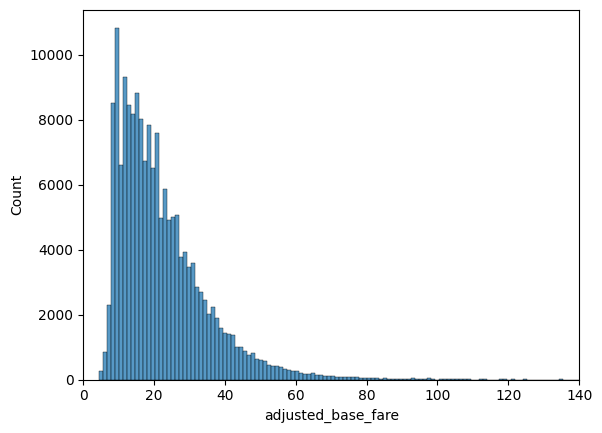

In [77]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)
sns.histplot(geo_uber_final['adjusted_base_fare'], bins=120)
plt.xlim(0,140)

(0.0, 140.0)

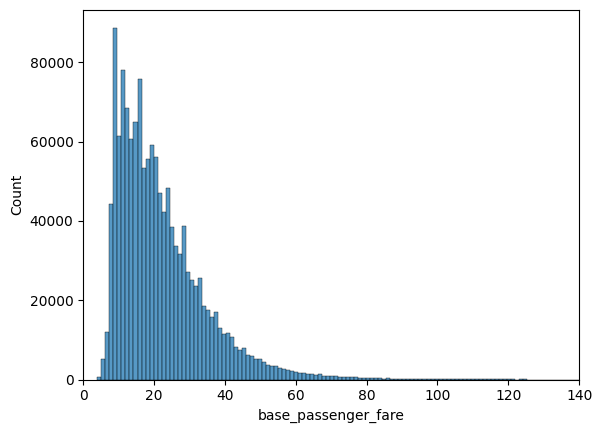

In [78]:
sns.histplot(geo_test_df['base_passenger_fare'], bins=120)
plt.xlim(0,140)

In [80]:
#Base in 2009 = 2.5

In [81]:
geo_uber_df_3[(geo_uber_df_3['pickup_datetime'] > '2009-01-01') & (geo_uber_df_3['pickup_datetime'] < '2015-01-01')]['fare_amount'].sort_values(ascending=True)[:25]

,fare_amount
89322,-49.57
92063,-23.70
151681,-10.90
104080,-7.30
139272,-6.90
148803,-5.70
71246,-3.30
22182,0.00
191228,0.01
149342,0.11


In [90]:
geo_test_df['congestion_surcharge'].value_counts()

,count
congestion_surcharge,
2.75,1251294
0.00,126064
0.75,43


In [91]:
geo_test_df[geo_test_df['congestion_surcharge'] == 2.75]

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [92]:
geo_test_df[geo_test_df['congestion_surcharge'] == 0]

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
1797534,2024-04-07 14:01:06,2024-04-07 14:02:52,2024-04-07 14:03:47,2024-04-07 14:17:34,127,152,4.90,827,17.59,0.0,0.48,1.56,0.0,0.0,Inwood,Manhattanville
142365,2024-04-01 17:57:59,2024-04-01 18:01:19,2024-04-01 18:01:33,2024-04-01 18:05:04,74,75,0.87,211,8.40,0.0,0.25,0.79,0.0,0.0,East Harlem North,East Harlem South
823105,2024-04-04 07:42:05,2024-04-04 07:46:10,2024-04-04 07:47:59,2024-04-04 08:01:46,75,166,2.41,827,17.34,0.0,0.48,1.54,0.0,0.0,East Harlem South,Morningside Heights
2747099,2024-04-11 18:39:41,2024-04-11 18:43:51,2024-04-11 18:43:51,2024-04-11 18:48:18,41,152,0.72,267,8.86,0.0,0.24,0.79,0.0,0.0,Central Harlem,Manhattanville
2245066,2024-04-09 17:19:33,2024-04-09 17:25:43,2024-04-09 17:26:31,2024-04-09 17:47:28,244,128,3.44,1257,22.35,0.0,0.61,1.98,0.0,0.0,Washington Heights South,Inwood Hill Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256663,2025-01-27 15:24:59,2025-01-27 15:26:53,2025-01-27 15:27:15,2025-01-27 15:45:10,244,166,2.91,1075,20.66,0.0,0.58,1.87,0.0,0.0,Washington Heights South,Morningside Heights
495276,2025-01-28 17:47:08,2025-01-28 17:49:52,2025-01-28 17:50:20,2025-01-28 17:59:31,166,41,0.98,551,8.55,0.0,0.23,0.75,0.0,0.0,Morningside Heights,Central Harlem
110676,2025-01-26 20:19:52,2025-01-26 20:20:31,2025-01-26 20:20:40,2025-01-26 20:25:34,244,244,1.90,294,9.72,0.0,0.26,0.86,0.0,0.0,Washington Heights South,Washington Heights South
787575,2025-01-29 20:10:54,2025-01-29 20:13:30,2025-01-29 20:13:54,2025-01-29 20:23:28,116,151,2.56,574,14.62,0.0,0.42,1.38,0.0,0.0,Hamilton Heights,Manhattan Valley


In [93]:
taxi_geo = pd.read_csv('/content/drive/MyDrive/PHASE_5_PROJECT/taxi_zones.csv')
taxi_geo

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [94]:
taxi_geo.drop(columns = ['OBJECTID', 'Shape_Leng', 'Shape_Area'], axis=1)

,the_geom,zone,LocationID,borough
0,MULTIPOLYGON (((-74.18445299999996 40.69499599...,Newark Airport,1,EWR
1,MULTIPOLYGON (((-73.82337597260663 40.63898704...,Jamaica Bay,2,Queens
2,MULTIPOLYGON (((-73.84792614099985 40.87134223...,Allerton/Pelham Gardens,3,Bronx
3,MULTIPOLYGON (((-73.97177410965318 40.72582128...,Alphabet City,4,Manhattan
4,MULTIPOLYGON (((-74.17421738099989 40.56256808...,Arden Heights,5,Staten Island
...,...,...,...,...
258,MULTIPOLYGON (((-73.95834207500002 40.71330630...,Williamsburg (South Side),256,Brooklyn
259,MULTIPOLYGON (((-73.85107116191898 40.91037152...,Woodlawn/Wakefield,259,Bronx
260,MULTIPOLYGON (((-73.90175373399988 40.76077547...,Woodside,260,Queens
261,MULTIPOLYGON (((-74.01332610899988 40.70503078...,World Trade Center,261,Manhattan


In [95]:
pickup = taxi_geo[['the_geom', 'LocationID']].copy()
pickup.columns= ['PU_Geom','PULocationID',]
dropoff = taxi_geo[['the_geom', 'LocationID']].copy()
dropoff.columns =['DO_Geom', 'DOLocationID',]

In [96]:
geo_df = pd.merge(
            geo_test_df,
            pickup,
            left_on = 'PULocationID',
            right_on = 'PULocationID',
            how = 'left'
)

geo_df = pd.merge(
            geo_df,
            dropoff,
            left_on = 'DOLocationID',
            right_on = 'DOLocationID',
            how = 'left'
)

In [97]:
geo_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone,PU_Geom,DO_Geom
0,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq,MULTIPOLYGON (((-74.00439976203513 40.76267135...,MULTIPOLYGON (((-73.98996936399989 40.73490456...
1,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District,MULTIPOLYGON (((-73.98362519999995 40.74394311...,MULTIPOLYGON (((-73.98729377099981 40.75045160...
2,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South,MULTIPOLYGON (((-73.97534377999993 40.75529969...,MULTIPOLYGON (((-73.96612747299989 40.76217929...
3,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay,MULTIPOLYGON (((-73.97203331099983 40.74580496...,MULTIPOLYGON (((-73.97219641647804 40.74040257...
4,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo,MULTIPOLYGON (((-74.00931760399995 40.72470155...,MULTIPOLYGON (((-74.001523638 40.7198207979999...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377396,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq,MULTIPOLYGON (((-73.99096832799995 40.74542088...,MULTIPOLYGON (((-74.00269315099992 40.72831405...
1377397,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North,MULTIPOLYGON (((-73.98996936399989 40.73490456...,MULTIPOLYGON (((-73.95779380499984 40.77359989...
1377398,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City,MULTIPOLYGON (((-74.00974639299996 40.70477524...,MULTIPOLYGON (((-73.97177410965318 40.72582128...
1377399,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay,MULTIPOLYGON (((-73.97534377999993 40.75529969...,MULTIPOLYGON (((-73.97219641647804 40.74040257...


In [98]:
early_uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00
...,...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27,-73.987798,40.721210,-73.980960,40.744388,1,2012-09-29 19:51:27
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00,-73.983070,40.760770,-73.972972,40.754177,1,2014-01-31 14:42:00
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00


In [100]:
early_uber['pickup_datetime']

,pickup_datetime
0,2015-05-07 19:52:06
1,2009-07-17 20:04:56
2,2009-08-24 21:45:00
3,2009-06-26 08:22:21
4,2014-08-28 17:47:00
...,...
199993,2012-09-29 19:51:27
199994,2014-01-31 14:42:00
199995,2012-10-28 10:49:00
199996,2014-03-14 01:09:00


In [101]:
early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-101-f624cfa85048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_uber['pickup_datetime'] = pd.to_datetime(early_uber['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')


In [102]:
type(early_uber['pickup_datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
type(geo_df['PU_Geom'][0])

str

In [104]:
geo_df = geo_df[geo_df['PU_Geom'].apply(lambda x: isinstance(x, str))]
geo_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone,PU_Geom,DO_Geom
0,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq,MULTIPOLYGON (((-74.00439976203513 40.76267135...,MULTIPOLYGON (((-73.98996936399989 40.73490456...
1,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District,MULTIPOLYGON (((-73.98362519999995 40.74394311...,MULTIPOLYGON (((-73.98729377099981 40.75045160...
2,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South,MULTIPOLYGON (((-73.97534377999993 40.75529969...,MULTIPOLYGON (((-73.96612747299989 40.76217929...
3,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay,MULTIPOLYGON (((-73.97203331099983 40.74580496...,MULTIPOLYGON (((-73.97219641647804 40.74040257...
4,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo,MULTIPOLYGON (((-74.00931760399995 40.72470155...,MULTIPOLYGON (((-74.001523638 40.7198207979999...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377396,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq,MULTIPOLYGON (((-73.99096832799995 40.74542088...,MULTIPOLYGON (((-74.00269315099992 40.72831405...
1377397,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North,MULTIPOLYGON (((-73.98996936399989 40.73490456...,MULTIPOLYGON (((-73.95779380499984 40.77359989...
1377398,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City,MULTIPOLYGON (((-74.00974639299996 40.70477524...,MULTIPOLYGON (((-73.97177410965318 40.72582128...
1377399,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay,MULTIPOLYGON (((-73.97534377999993 40.75529969...,MULTIPOLYGON (((-73.97219641647804 40.74040257...


In [105]:
early_uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00
...,...,...,...,...,...,...,...,...,...,...
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27,-73.987798,40.721210,-73.980960,40.744388,1,2012-09-29 19:51:27
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00,-73.983070,40.760770,-73.972972,40.754177,1,2014-01-31 14:42:00
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00


In [106]:
early_uber[(early_uber['pickup_datetime'] > '2014-01-01 14:00:00' ) & (early_uber['pickup_datetime'] < '2014-01-01 18:00:00')]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dropoff_datetime
41575,33333263,2014-01-01 15:39:00.000000103,10.0,2014-01-01 15:39:00,-73.969102,40.761650,-74.002365,40.755857,1,2014-01-01 15:39:00
45885,3136290,2014-01-01 17:17:00.000000176,9.5,2014-01-01 17:17:00,-73.985215,40.742127,-73.985415,40.721850,1,2014-01-01 17:17:00
66628,9067259,2014-01-01 15:22:00.000000100,4.5,2014-01-01 15:22:00,-73.982917,40.738102,-73.979425,40.732717,6,2014-01-01 15:22:00
66904,11661789,2014-01-01 14:31:00.00000040,19.5,2014-01-01 14:31:00,-73.960620,40.806667,-73.983792,40.743845,1,2014-01-01 14:31:00
96706,4288285,2014-01-01 16:35:03.0000003,12.5,2014-01-01 16:35:03,-73.977788,40.757772,-73.989443,40.741751,4,2014-01-01 16:35:03
112849,36282486,2014-01-01 15:37:54.0000003,6.0,2014-01-01 15:37:54,-73.997931,40.736265,-73.985425,40.730838,1,2014-01-01 15:37:54
112894,2682206,2014-01-01 17:03:59.0000003,17.5,2014-01-01 17:03:59,-73.970543,40.762333,-73.997345,40.716130,1,2014-01-01 17:03:59
132889,33880879,2014-01-01 17:31:00.00000016,15.5,2014-01-01 17:31:00,-74.015270,40.715862,-73.984902,40.719420,1,2014-01-01 17:31:00
142833,14879236,2014-01-01 14:28:13.0000002,10.0,2014-01-01 14:28:13,-73.988680,40.774305,-73.980932,40.753361,2,2014-01-01 14:28:13
146444,18340800,2014-01-01 15:06:00.00000080,9.0,2014-01-01 15:06:00,-74.004348,40.730965,-74.016727,40.705547,1,2014-01-01 15:06:00


In [107]:
geo_df[(geo_df['pickup_datetime'] > '2025-01-01 17:00:00') & (geo_df['pickup_datetime'] < '2025-01-01 18:00:00')]

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone,PU_Geom,DO_Geom
1262553,2025-01-01 17:30:00,2025-01-01 17:07:08,2025-01-01 17:10:13,2025-01-01 17:19:33,90,107,1.04,560,54.81,0.0,1.51,4.87,2.75,0.0,Flatiron,Gramercy,MULTIPOLYGON (((-73.9963368949999 40.738043746...,MULTIPOLYGON (((-73.98238628799993 40.73141124...
1262858,2025-01-01 17:28:07,2025-01-01 17:33:08,2025-01-01 17:34:20,2025-01-01 17:46:53,249,87,2.18,753,21.12,0.0,0.57,1.84,2.75,0.0,West Village,Financial District North,MULTIPOLYGON (((-74.00250642399995 40.72901638...,MULTIPOLYGON (((-74.00372234899996 40.70693234...
1263334,2025-01-01 17:47:14,2025-01-01 17:49:38,2025-01-01 17:51:39,2025-01-01 18:00:21,107,233,1.09,522,10.22,0.0,0.28,0.91,2.75,0.0,Gramercy,UN/Turtle Bay South,MULTIPOLYGON (((-73.98238628799993 40.73141124...,MULTIPOLYGON (((-73.96547092299994 40.75193959...
1263472,2025-01-01 17:06:30,2025-01-01 17:08:09,2025-01-01 17:10:10,2025-01-01 17:28:48,229,48,1.89,1118,24.58,0.0,0.67,2.17,2.75,0.0,Sutton Place/Turtle Bay North,Clinton East,MULTIPOLYGON (((-73.96162927534907 40.75515238...,MULTIPOLYGON (((-73.99117738199989 40.75532984...
1263538,2025-01-01 17:07:26,2025-01-01 17:08:41,2025-01-01 17:08:51,2025-01-01 17:18:32,158,234,1.37,581,14.49,0.0,0.40,1.29,2.75,0.0,Meatpacking/West Village West,Union Sq,MULTIPOLYGON (((-74.00779116099989 40.74197084...,MULTIPOLYGON (((-73.98996936399989 40.73490456...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306143,2025-01-01 17:28:15,2025-01-01 17:32:52,2025-01-01 17:33:22,2025-01-01 17:50:24,246,239,4.13,1022,26.12,0.0,0.72,2.32,2.75,0.0,West Chelsea/Hudson Yards,Upper West Side South,MULTIPOLYGON (((-74.00439976203513 40.76267135...,MULTIPOLYGON (((-73.97501417199996 40.78768560...
1306477,2025-01-01 16:56:24,2025-01-01 16:58:38,2025-01-01 17:00:38,2025-01-01 17:10:44,50,186,1.47,606,16.34,0.0,0.45,1.45,2.75,0.0,Clinton West,Penn Station/Madison Sq West,MULTIPOLYGON (((-73.99667705784736 40.77351005...,MULTIPOLYGON (((-73.99096832799995 40.74542088...
1306552,2025-01-01 17:25:33,2025-01-01 17:26:30,2025-01-01 17:27:05,2025-01-01 17:48:42,43,161,1.51,1297,19.86,0.0,0.54,1.76,2.75,0.0,Central Park,Midtown Center,MULTIPOLYGON (((-73.97255352299985 40.76489773...,MULTIPOLYGON (((-73.97534377999993 40.75529969...
1306726,2025-01-01 17:18:31,2025-01-01 17:20:50,2025-01-01 17:21:45,2025-01-01 17:38:49,113,13,2.92,1024,21.26,0.0,0.58,1.90,2.75,0.0,Greenwich Village North,Battery Park City,MULTIPOLYGON (((-73.99136388099987 40.72755978...,MULTIPOLYGON (((-74.01244109299991 40.71905767...


In [108]:
Secondary_df = geo_uber_final.drop(columns=['dropoff_datetime',	'num_months_since_2009'])

# Calculation Secondary Data Dropoff Time

In [471]:
geo_test_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [472]:
Secondary_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.95
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.45
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.10
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,40.73
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09,-73.969019,40.755910,-73.969019,40.755910,1,10.66
...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,9.51
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,13.88
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,7.96
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,13.36


# Determining Distance (Needs 40-60 Minutes to finish)

In [ ]:
def is_grid_area(lat, lon):
    return 40.735 <= lat <= 40.83

def manhattan_distance(lat1, lon1, lat2, lon2, scale_factor=69):
    """
    scale_factor=69 converts degrees to miles for NYC.
    """
    lat_dist = abs(lat1 - lat2)
    lon_dist = abs(lon1 - lon2)
    return (lat_dist + lon_dist) * scale_factor

!pip install osmnx
!pip install networkx
!pip install tqdm

import osmnx as ox
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm


G = ox.graph_from_place("Manhattan, New York City, New York, USA", network_type='drive')

def road_distance(row):
    try:
        orig_node = ox.distance.nearest_nodes(G, row['pickup_longitude'], row['pickup_latitude'])
        dest_node = ox.distance.nearest_nodes(G, row['dropoff_longitude'], row['dropoff_latitude'])

        length = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
        return length / 1609.34
    except Exception as e:
        return np.nan


def smart_distance(row):
    if is_grid_area(row['pickup_latitude'], row['pickup_longitude']) and \
       is_grid_area(row['dropoff_latitude'], row['dropoff_longitude']):
       return manhattan_distance(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        )
    else:
        return road_distance(row)

from tqdm.notebook import tqdm
tqdm.pandas()
Secondary_df['distance'] = Secondary_df.progress_apply(smart_distance, axis=1)


Secondary_df.to_parquet('/content/drive/MyDrive/Secondary_df_with_distance_V3.parquet')


print("Distance column calculated and file saved")


📍 Loading OSM road network...
🚦 Calculating distances (with progress bar)...


  0%|          | 0/172914 [00:00<?, ?it/s]

✅ Distance column calculated and file saved!


#Determining Dropoff Time

In [473]:
distance_df = pd.read_parquet('/content/drive/MyDrive/Secondary_df_with_distance_V3.parquet')
distance_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,1.306177
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,1.959462
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,5.130495
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,4.500249
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09,-73.969019,40.755910,-73.969019,40.755910,1,9.96,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,0.696486
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,2.045850
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,0.541168
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,1.446102


<Axes: xlabel='trip_miles', ylabel='Count'>

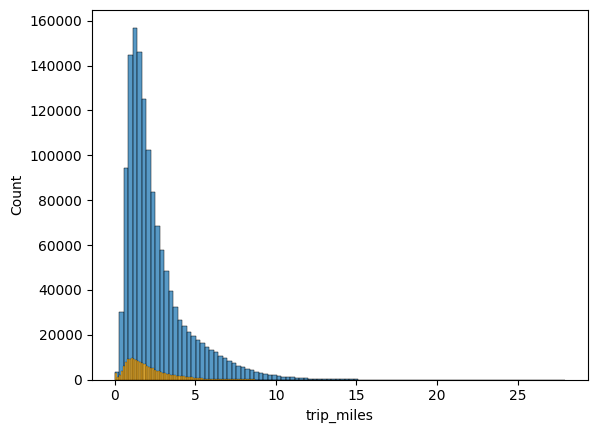

In [474]:
sns.histplot(geo_test_df['trip_miles'], bins=100)
sns.histplot(distance_df['distance'], bins=100, color='orange')


In [475]:
geo_test_df['trip_miles'].describe()

,trip_miles
count,1.377401e+06
mean,2.551665e+00
std,1.937714e+00
min,0.000000e+00
25%,1.240000e+00
50%,1.930000e+00
75%,3.180000e+00
max,2.797000e+01


In [476]:
distance_df_2 = distance_df[distance_df['distance'] != 0 ]

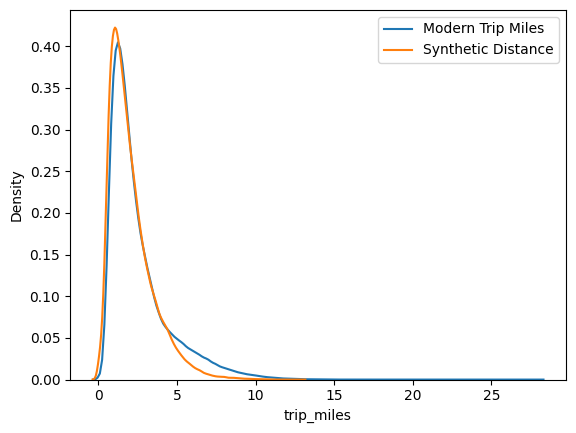

In [477]:
sns.kdeplot(geo_test_df['trip_miles'], label='Modern Trip Miles')
sns.kdeplot(distance_df_2['distance'], label='Synthetic Distance')
plt.legend()


In [479]:
geo_test_df_clipped = geo_test_df[geo_test_df['trip_miles'] <= 12.8]


In [480]:
#distance_df[distance_df['distance'] == 0]

In [481]:
distance_df_2['base_passenger_fare'] = distance_df_2['fare_amount']
distance_df_2['base_passenger_fare'] = distance_df_2['adjusted_base_fare']

<ipython-input-481-0a6ea005973d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['base_passenger_fare'] = distance_df_2['fare_amount']
<ipython-input-481-0a6ea005973d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['base_passenger_fare'] = distance_df_2['adjusted_base_fare']


In [482]:
distance_df_2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,distance,base_passenger_fare
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,1.306177,17.39
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,1.959462,18.41
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,5.130495,32.91
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,4.500249,41.00
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00,-73.975187,40.745767,-74.002720,40.743537,1,24.95,2.053647,24.95
...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,0.696486,8.99
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,2.045850,14.30
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,0.541168,8.67
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,1.446102,14.04


In [483]:
distance_df_2['base_passenger_fare'].sort_values()

,base_passenger_fare
38604,4.53
25672,4.53
143813,4.60
43233,4.62
126325,4.62
...,...
128128,137.26
73591,137.77
15362,138.24
2053,138.66


In [484]:
distance_df_2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,distance,base_passenger_fare
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,1.306177,17.39
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,1.959462,18.41
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,5.130495,32.91
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,4.500249,41.00
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00,-73.975187,40.745767,-74.002720,40.743537,1,24.95,2.053647,24.95
...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,0.696486,8.99
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,2.045850,14.30
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,0.541168,8.67
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,1.446102,14.04


In [485]:
distance_df_2['base_passenger_fare'].sort_values()

,base_passenger_fare
38604,4.53
25672,4.53
143813,4.60
43233,4.62
126325,4.62
...,...
128128,137.26
73591,137.77
15362,138.24
2053,138.66


In [486]:
geo_test_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [487]:
type(geo_test_df['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [488]:
scaling_factor = geo_test_df_clipped['trip_miles'].mean() / distance_df_2['distance'].mean()
distance_df_2['distance_scaled'] = distance_df_2['distance'] * scaling_factor

<ipython-input-488-885e240f6dbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_2['distance_scaled'] = distance_df_2['distance'] * scaling_factor


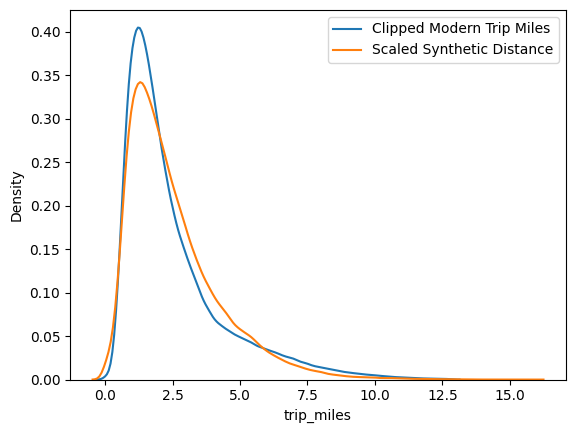

In [489]:
sns.kdeplot(geo_test_df_clipped['trip_miles'], label='Clipped Modern Trip Miles')
sns.kdeplot(distance_df_2['distance_scaled'], label='Scaled Synthetic Distance')
plt.legend()


In [491]:
distance_df_2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,distance,base_passenger_fare,distance_scaled
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,1.306177,17.39,1.612214
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,1.959462,18.41,2.418562
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,5.130495,32.91,6.332567
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,4.500249,41.00,5.554655
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00,-73.975187,40.745767,-74.002720,40.743537,1,24.95,2.053647,24.95,2.534815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,0.696486,8.99,0.859672
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,2.045850,14.30,2.525192
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,0.541168,8.67,0.667964
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,1.446102,14.04,1.784923


In [493]:
distance_df_4 = distance_df_2

<Axes: xlabel='base_passenger_fare', ylabel='trip_time'>

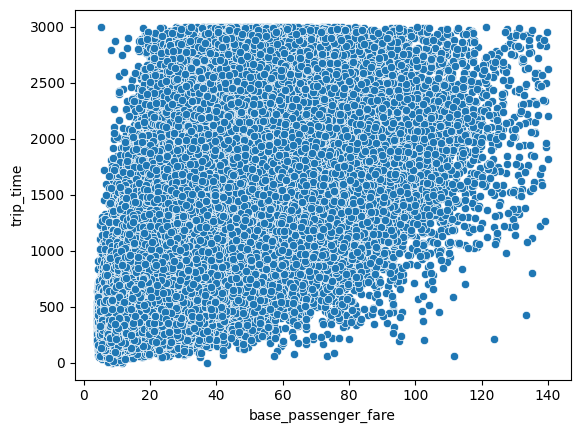

In [495]:
sns.scatterplot(data=geo_test_df, x = 'base_passenger_fare', y = 'trip_time')

In [496]:
distance_df_4['base_passenger_fare'].sort_values()

,base_passenger_fare
38604,4.53
25672,4.53
143813,4.60
43233,4.62
126325,4.62
...,...
128128,137.26
73591,137.77
15362,138.24
2053,138.66


In [497]:
distance_df_5 = distance_df_4

In [498]:
distance_df_5['trip_miles'] = distance_df_5['distance_scaled']

<ipython-input-498-a390c81939b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['trip_miles'] = distance_df_5['distance_scaled']


In [499]:
distance_df_5

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,distance,base_passenger_fare,distance_scaled,trip_miles
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,1.306177,17.39,1.612214,1.612214
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,1.959462,18.41,2.418562,2.418562
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,5.130495,32.91,6.332567,6.332567
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,4.500249,41.00,5.554655,5.554655
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00,-73.975187,40.745767,-74.002720,40.743537,1,24.95,2.053647,24.95,2.534815,2.534815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,0.696486,8.99,0.859672,0.859672
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,2.045850,14.30,2.525192,2.525192
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,0.541168,8.67,0.667964,0.667964
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,1.446102,14.04,1.784923,1.784923


In [502]:
geo_test_df_clipped['pickup_year'] = geo_test_df_clipped['pickup_datetime'].dt.year.astype(int)


geo_test_df_clipped['pickup_month'] = geo_test_df_clipped['pickup_datetime'].dt.month.astype(int)
geo_test_df_clipped['pickup_month_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_month']/12)
geo_test_df_clipped['pickup_month_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_month']/12)

geo_test_df_clipped['pickup_day'] = geo_test_df_clipped['pickup_datetime'].dt.day.astype(int)
geo_test_df_clipped['days_in_month'] = geo_test_df_clipped['pickup_datetime'].dt.days_in_month.astype(int)
geo_test_df_clipped['pickup_day_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_day']/geo_test_df_clipped['days_in_month'])
geo_test_df_clipped['pickup_day_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_day']/geo_test_df_clipped['days_in_month'])

geo_test_df_clipped['pickup_dayofweek'] = geo_test_df_clipped['pickup_datetime'].dt.dayofweek
geo_test_df_clipped['pickup_dow_sin'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_dayofweek'] / 7)
geo_test_df_clipped['pickup_dow_cos'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_dayofweek'] / 7)

geo_test_df_clipped['pickup_hour'] = geo_test_df_clipped['pickup_datetime'].dt.hour.astype(int)
geo_test_df_clipped['pickup_hour_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_hour']/24)
geo_test_df_clipped['pickup_hour_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_hour']/24)

geo_test_df_clipped['pickup_minute'] = geo_test_df_clipped['pickup_datetime'].dt.minute.astype(int)
geo_test_df_clipped['pickup_minute_cos'] = np.sin(2 * np.pi * geo_test_df_clipped['pickup_minute']/60)
geo_test_df_clipped['pickup_minute_sin'] = np.cos(2 * np.pi * geo_test_df_clipped['pickup_minute']/60)

<ipython-input-502-de61a6c31b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_test_df_clipped['pickup_year'] = geo_test_df_clipped['pickup_datetime'].dt.year.astype(int)
<ipython-input-502-de61a6c31b70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_test_df_clipped['pickup_month'] = geo_test_df_clipped['pickup_datetime'].dt.month.astype(int)
<ipython-input-502-de61a6c31b70>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [503]:
features = ['trip_miles','base_passenger_fare', 'pickup_month_cos', 'pickup_month_sin', 'pickup_day_cos',
            'pickup_day_sin', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute_cos',
            'pickup_minute_sin']
X = geo_test_df_clipped[features]
y = geo_test_df_clipped['trip_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [504]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 )
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics = ['root_mean_squared_error','mean_absolute_error'])

In [505]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='val_loss', min_delta = 1e-4, patience = 10)


In [506]:
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=.2, callbacks=[trainCallback])


2025/04/11 20:15:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '220f0de2bca3485abe187f48c4bf544c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2025/04/11 20:15:56 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_2' has no defined input shape yet.
2025/04/11 20:15:56 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215401.6094 - mean_absolute_error: 310.4722 - root_mean_squared_error: 439.9170

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 215371.6562 - mean_absolute_error: 310.4489 - root_mean_squared_error: 439.8865 - val_loss: 73891.3438 - val_mean_absolute_error: 193.0154 - val_root_mean_squared_error: 271.8296
Epoch 2/25
3435/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73126.4141 - mean_absolute_error: 193.1442 - root_mean_squared_error: 270.4147

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 73124.5391 - mean_absolute_error: 193.1421 - root_mean_squared_error: 270.4113 - val_loss: 70907.3047 - val_mean_absolute_error: 193.0377 - val_root_mean_squared_error: 266.2842
Epoch 3/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 70886.0312 - mean_absolute_error: 190.7559 - root_mean_squared_error: 266.2424 - val_loss: 71487.5703 - val_mean_absolute_error: 196.2433 - val_root_mean_squared_error: 267.3716
Epoch 4/25
3428/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70411.6875 - mean_absolute_error: 189.9567 - root_mean_squared_error: 265.3507

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 70410.9844 - mean_absolute_error: 189.9564 - root_mean_squared_error: 265.3494 - val_loss: 69460.1562 - val_mean_absolute_error: 188.5120 - val_root_mean_squared_error: 263.5529
Epoch 5/25
3433/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69754.7422 - mean_absolute_error: 189.3263 - root_mean_squared_error: 264.1086

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 69754.7031 - mean_absolute_error: 189.3259 - root_mean_squared_error: 264.1085 - val_loss: 69132.7188 - val_mean_absolute_error: 188.6816 - val_root_mean_squared_error: 262.9310
Epoch 6/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 69407.7891 - mean_absolute_error: 188.6048 - root_mean_squared_error: 263.4525 - val_loss: 69348.5391 - val_mean_absolute_error: 191.9087 - val_root_mean_squared_error: 263.3411
Epoch 7/25
3437/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69230.6641 - mean_absolute_error: 188.2581 - root_mean_squared_error: 263.1163

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 69230.4062 - mean_absolute_error: 188.2578 - root_mean_squared_error: 263.1158 - val_loss: 68352.9062 - val_mean_absolute_error: 187.5589 - val_root_mean_squared_error: 261.4439
Epoch 8/25
3433/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68882.3516 - mean_absolute_error: 187.7473 - root_mean_squared_error: 262.4539

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 68882.0938 - mean_absolute_error: 187.7468 - root_mean_squared_error: 262.4534 - val_loss: 68160.8203 - val_mean_absolute_error: 185.9529 - val_root_mean_squared_error: 261.0763
Epoch 9/25
3430/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68550.8984 - mean_absolute_error: 187.1710 - root_mean_squared_error: 261.8191

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 68550.7344 - mean_absolute_error: 187.1705 - root_mean_squared_error: 261.8188 - val_loss: 68044.9609 - val_mean_absolute_error: 187.5905 - val_root_mean_squared_error: 260.8543
Epoch 10/25
3429/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68515.1406 - mean_absolute_error: 186.9336 - root_mean_squared_error: 261.7523

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 68514.2578 - mean_absolute_error: 186.9324 - root_mean_squared_error: 261.7506 - val_loss: 67672.8672 - val_mean_absolute_error: 186.1630 - val_root_mean_squared_error: 260.1401
Epoch 11/25
3439/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67977.4844 - mean_absolute_error: 186.1046 - root_mean_squared_error: 260.7238

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67977.5312 - mean_absolute_error: 186.1047 - root_mean_squared_error: 260.7239 - val_loss: 67426.0703 - val_mean_absolute_error: 185.1082 - val_root_mean_squared_error: 259.6653
Epoch 12/25
3431/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67860.7969 - mean_absolute_error: 185.8034 - root_mean_squared_error: 260.5002

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67860.6562 - mean_absolute_error: 185.8036 - root_mean_squared_error: 260.4999 - val_loss: 67119.7344 - val_mean_absolute_error: 185.0589 - val_root_mean_squared_error: 259.0748
Epoch 13/25
3431/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67480.2500 - mean_absolute_error: 185.4237 - root_mean_squared_error: 259.7678

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 67480.7031 - mean_absolute_error: 185.4242 - root_mean_squared_error: 259.7686 - val_loss: 66871.2188 - val_mean_absolute_error: 184.7103 - val_root_mean_squared_error: 258.5947
Epoch 14/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67899.5234 - mean_absolute_error: 185.7784 - root_mean_squared_error: 260.5720 - val_loss: 66930.1172 - val_mean_absolute_error: 185.1136 - val_root_mean_squared_error: 258.7086
Epoch 15/25
3424/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67385.1562 - mean_absolute_error: 185.2909 - root_mean_squared_error: 259.5855

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67384.8828 - mean_absolute_error: 185.2898 - root_mean_squared_error: 259.5850 - val_loss: 66867.2344 - val_mean_absolute_error: 185.0926 - val_root_mean_squared_error: 258.5870
Epoch 16/25
3434/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67412.8828 - mean_absolute_error: 185.1017 - root_mean_squared_error: 259.6374

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67412.4844 - mean_absolute_error: 185.1013 - root_mean_squared_error: 259.6367 - val_loss: 66530.5078 - val_mean_absolute_error: 184.5150 - val_root_mean_squared_error: 257.9351
Epoch 17/25
3428/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66975.2188 - mean_absolute_error: 184.5751 - root_mean_squared_error: 258.7952

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 66975.7656 - mean_absolute_error: 184.5757 - root_mean_squared_error: 258.7962 - val_loss: 66525.7891 - val_mean_absolute_error: 183.4937 - val_root_mean_squared_error: 257.9259
Epoch 18/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 67168.3438 - mean_absolute_error: 184.5992 - root_mean_squared_error: 259.1674 - val_loss: 67562.2969 - val_mean_absolute_error: 189.4505 - val_root_mean_squared_error: 259.9275
Epoch 19/25
3430/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66863.2344 - mean_absolute_error: 184.3955 - root_mean_squared_error: 258.5790

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 66863.6641 - mean_absolute_error: 184.3961 - root_mean_squared_error: 258.5798 - val_loss: 66320.1328 - val_mean_absolute_error: 184.4073 - val_root_mean_squared_error: 257.5269
Epoch 20/25
3431/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67208.5469 - mean_absolute_error: 184.7803 - root_mean_squared_error: 259.2411

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 67207.5391 - mean_absolute_error: 184.7791 - root_mean_squared_error: 259.2392 - val_loss: 66304.1797 - val_mean_absolute_error: 182.6115 - val_root_mean_squared_error: 257.4960
Epoch 21/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 66902.4766 - mean_absolute_error: 184.4678 - root_mean_squared_error: 258.6547 - val_loss: 66478.6484 - val_mean_absolute_error: 184.8800 - val_root_mean_squared_error: 257.8345
Epoch 22/25
3425/3441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66613.4688 - mean_absolute_error: 184.0308 - root_mean_squared_error: 258.0940

3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 66614.3672 - mean_absolute_error: 184.0320 - root_mean_squared_error: 258.0958 - val_loss: 66219.1406 - val_mean_absolute_error: 182.7640 - val_root_mean_squared_error: 257.3308
Epoch 23/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 66794.2188 - mean_absolute_error: 184.2535 - root_mean_squared_error: 258.4443 - val_loss: 67490.2734 - val_mean_absolute_error: 189.3367 - val_root_mean_squared_error: 259.7889
Epoch 24/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 66454.2578 - mean_absolute_error: 183.8629 - root_mean_squared_error: 257.7867 - val_loss: 66486.6406 - val_mean_absolute_error: 181.7440 - val_root_mean_squared_error: 257.8500
Epoch 25/25
3441/3441 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 66618.5469 - mean_absolute_error: 183.9705 - root_mean_squared_error: 258.1052 - val_loss: 66232.8281 - val_mean_absolute_error: 182.5571 - val_root_mean_squared_error: 257.3574


2025/04/11 20:21:09 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2025/04/11 20:21:09 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/04/11 20:21:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [507]:
distance_df_5['pickup_year'] = distance_df_5['pickup_datetime'].dt.year.astype(int)


distance_df_5['pickup_month'] = distance_df_5['pickup_datetime'].dt.month.astype(int)
distance_df_5['pickup_month_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_month']/12)
distance_df_5['pickup_month_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_month']/12)

distance_df_5['pickup_day'] = distance_df_5['pickup_datetime'].dt.day.astype(int)
distance_df_5['days_in_month'] = distance_df_5['pickup_datetime'].dt.days_in_month.astype(int)
distance_df_5['pickup_day_sin'] = np.sin(2 * np.pi * distance_df_5['pickup_day'] / distance_df_5['days_in_month'])
distance_df_5['pickup_day_cos'] = np.cos(2 * np.pi * distance_df_5['pickup_day'] / distance_df_5['days_in_month'])

distance_df_5['pickup_dayofweek'] = distance_df_5['pickup_datetime'].dt.dayofweek.astype(int)
distance_df_5['pickup_dow_sin'] = np.sin(2 * np.pi * distance_df_5['pickup_dayofweek'] / 7)
distance_df_5['pickup_dow_cos'] = np.cos(2 * np.pi * distance_df_5['pickup_dayofweek'] / 7)


distance_df_5['pickup_hour'] = distance_df_5['pickup_datetime'].dt.hour.astype(int)
distance_df_5['pickup_hour_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_hour']/24)
distance_df_5['pickup_hour_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_hour']/24)

distance_df_5['pickup_minute'] = distance_df_5['pickup_datetime'].dt.minute.astype(int)
distance_df_5['pickup_minute_cos'] = np.sin(2 * np.pi * distance_df_5['pickup_minute']/60)
distance_df_5['pickup_minute_sin'] = np.cos(2 * np.pi * distance_df_5['pickup_minute']/60)

X_2009 = distance_df_5[features]

<ipython-input-507-8dfe8121289e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['pickup_year'] = distance_df_5['pickup_datetime'].dt.year.astype(int)
<ipython-input-507-8dfe8121289e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['pickup_month'] = distance_df_5['pickup_datetime'].dt.month.astype(int)
<ipython-input-507-8dfe8121289e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [508]:
distance_df_5['predicted_trip_time'] = model.predict(X_2009)
distance_df_5['estimated_dropoff_time'] = distance_df_5['pickup_datetime'] + pd.to_timedelta(distance_df_5['predicted_trip_time'], unit='s')

5347/5347 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


<ipython-input-508-7286c6298dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['predicted_trip_time'] = model.predict(X_2009)
<ipython-input-508-7286c6298dd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df_5['estimated_dropoff_time'] = distance_df_5['pickup_datetime'] + pd.to_timedelta(distance_df_5['predicted_trip_time'], unit='s')


In [509]:
geo_test_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [510]:
geo_test_df['trip_time'].sort_values()

,trip_time
3006476,0
3290186,1
2257466,1
355510,3
145551,3
...,...
2477634,2999
2559297,2999
2098217,2999
922226,2999


<Axes: xlabel='base_passenger_fare', ylabel='trip_time'>

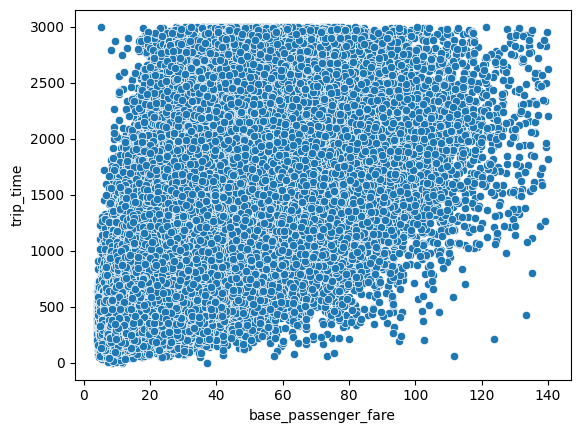

In [511]:
sns.scatterplot( data = geo_test_df_clipped, x = 'base_passenger_fare', y = 'trip_time')

<Axes: xlabel='base_passenger_fare', ylabel='predicted_trip_time'>

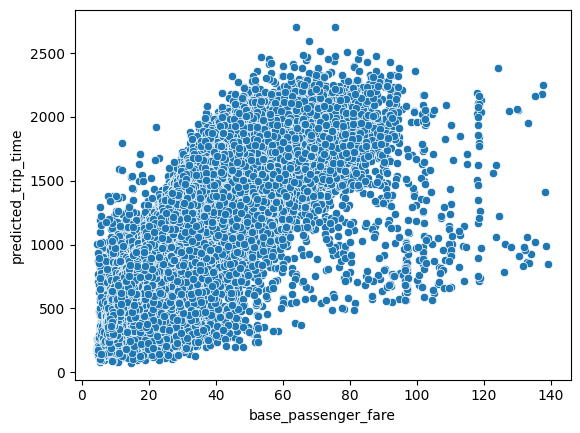

In [512]:
sns.scatterplot( data = distance_df_5, x = 'base_passenger_fare', y = 'predicted_trip_time')

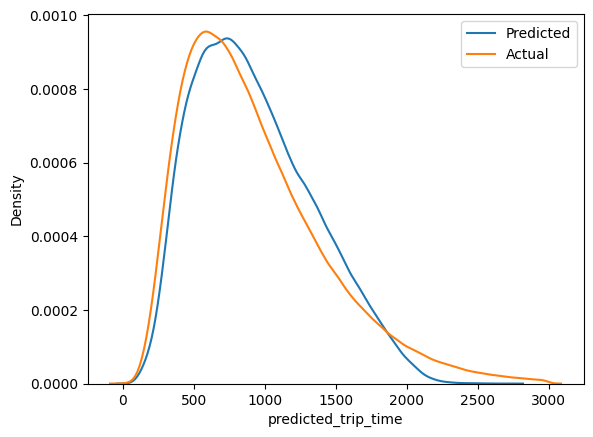

In [513]:
sns.kdeplot(distance_df_5['predicted_trip_time'], label='Predicted')
sns.kdeplot(geo_test_df['trip_time'], label='Actual')
plt.legend()


<Axes: xlabel='base_passenger_fare', ylabel='Density'>

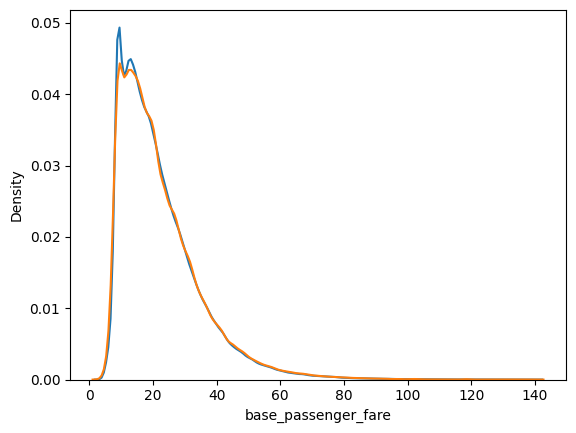

In [514]:
sns.kdeplot(geo_test_df['base_passenger_fare'], label='Real Fare')
sns.kdeplot(distance_df_5['base_passenger_fare'], label='Synthetic Fare')


In [515]:
geo_test_df

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,pickup_zone,dropoff_zone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,0.30,0.96,2.75,0.0,West Chelsea/Hudson Yards,Union Sq
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,0.40,1.29,2.75,0.0,Midtown South,Garment District
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,0.45,1.44,2.75,0.0,Midtown Center,Upper East Side South
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,0.23,0.73,2.75,0.0,Murray Hill,Kips Bay
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,0.73,2.35,2.75,0.0,TriBeCa/Civic Center,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,0.38,1.36,2.75,0.0,Penn Station/Madison Sq West,Hudson Sq
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,1.22,4.03,2.75,0.0,Union Sq,Upper East Side North
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,0.31,1.08,2.75,0.0,Financial District South,Alphabet City
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,0.27,1.03,2.75,0.0,Midtown Center,Kips Bay


In [516]:
distance_df_5

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,adjusted_base_fare,...,pickup_dow_sin,pickup_dow_cos,pickup_hour,pickup_hour_cos,pickup_hour_sin,pickup_minute,pickup_minute_cos,pickup_minute_sin,predicted_trip_time,estimated_dropoff_time
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,17.39,...,0.433884,-0.900969,19,-0.965926,0.258819,52,-0.743145,6.691306e-01,841.258545,2015-05-07 20:06:07.258544922
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,18.41,...,-0.433884,-0.900969,20,-0.866025,0.500000,4,0.406737,9.135455e-01,956.941589,2009-07-17 20:20:52.941589355
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,32.91,...,0.000000,1.000000,21,-0.707107,0.707107,45,-1.000000,-1.836970e-16,1272.290283,2009-08-24 22:06:12.290283203
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,41.00,...,0.433884,-0.900969,17,-0.965926,-0.258819,47,-0.978148,2.079117e-01,1731.828369,2014-08-28 18:15:51.828369141
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00,-73.975187,40.745767,-74.002720,40.743537,1,24.95,...,-0.433884,-0.900969,9,0.707107,-0.707107,32,-0.207912,-9.781476e-01,1162.705322,2012-02-17 09:51:22.705322266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199673,44943450,2009-12-15 07:53:00.00000063,4.5,2009-12-15 07:53:00,-73.973547,40.792330,-73.968370,40.787413,1,8.99,...,0.781831,0.623490,7,0.965926,-0.258819,53,-0.669131,7.431448e-01,396.600555,2009-12-15 07:59:36.600555420
199701,44895432,2009-09-16 10:46:52.0000001,6.1,2009-09-16 10:46:52,-73.974610,40.790523,-73.961033,40.806596,1,14.30,...,0.974928,-0.222521,10,0.500000,-0.866025,46,-0.994522,1.045285e-01,839.385742,2009-09-16 11:00:51.385742188
199735,18714081,2015-01-22 16:52:06.0000001,4.0,2015-01-22 16:52:06,-73.972771,40.796940,-73.966850,40.798862,1,8.67,...,0.433884,-0.900969,16,-0.866025,-0.500000,52,-0.743145,6.691306e-01,348.196503,2015-01-22 16:57:54.196502686
199761,10343914,2013-06-24 13:06:00.000000176,6.0,2013-06-24 13:06:00,-73.957107,40.802107,-73.969918,40.793960,1,14.04,...,0.000000,1.000000,13,-0.258819,-0.965926,6,0.587785,8.090170e-01,756.138245,2013-06-24 13:18:36.138244629


# Dealing with Taxi Zones

In [520]:
geo_test_df_clipped

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,...,pickup_day_sin,pickup_dayofweek,pickup_dow_sin,pickup_dow_cos,pickup_hour,pickup_hour_cos,pickup_hour_sin,pickup_minute,pickup_minute_cos,pickup_minute_sin
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,...,0.913545,1,0.781831,0.623490,18,-1.000000,-1.836970e-16,42,-0.951057,-0.309017
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,...,-0.309017,1,0.781831,0.623490,23,-0.258819,9.659258e-01,46,-0.994522,0.104528
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,...,0.809017,2,0.974928,-0.222521,15,-0.707107,-7.071068e-01,51,-0.809017,0.587785
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,...,-0.104528,0,0.000000,1.000000,14,-0.500000,-8.660254e-01,56,-0.406737,0.913545
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,...,0.809017,2,0.974928,-0.222521,15,-0.707107,-7.071068e-01,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,...,1.000000,4,-0.433884,-0.900969,2,0.500000,8.660254e-01,6,0.587785,0.809017
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,...,0.979530,3,0.433884,-0.900969,22,-0.500000,8.660254e-01,26,0.406737,-0.913545
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,...,0.688967,0,0.000000,1.000000,22,-0.500000,8.660254e-01,1,0.104528,0.994522
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,...,1.000000,4,-0.433884,-0.900969,0,0.000000,1.000000e+00,33,-0.309017,-0.951057


In [521]:
taxi_geo

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


In [522]:
pickup = taxi_geo[['the_geom', 'LocationID', 'zone']].copy()
pickup.columns= ['PU_Geom','PULocationID','PU_zone']
dropoff = taxi_geo[['the_geom', 'LocationID', 'zone']].copy()
dropoff.columns =['DO_Geom', 'DOLocationID', 'DO_zone']

In [523]:
geo_clipped_merged = pd.merge(
            geo_test_df_clipped,
            pickup,
            left_on = 'PULocationID',
            right_on = 'PULocationID',
            how = 'left'
)

geo_clipped_merged = pd.merge(
            geo_clipped_merged,
            dropoff,
            left_on = 'DOLocationID',
            right_on = 'DOLocationID',
            how = 'left'
)

In [524]:
geo_clipped_merged

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,...,pickup_hour,pickup_hour_cos,pickup_hour_sin,pickup_minute,pickup_minute_cos,pickup_minute_sin,PU_Geom,PU_zone,DO_Geom,DO_zone
0,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,...,18,-1.000000,-1.836970e-16,42,-0.951057,-0.309017,MULTIPOLYGON (((-74.00439976203513 40.76267135...,West Chelsea/Hudson Yards,MULTIPOLYGON (((-73.98996936399989 40.73490456...,Union Sq
1,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,...,23,-0.258819,9.659258e-01,46,-0.994522,0.104528,MULTIPOLYGON (((-73.98362519999995 40.74394311...,Midtown South,MULTIPOLYGON (((-73.98729377099981 40.75045160...,Garment District
2,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,...,15,-0.707107,-7.071068e-01,51,-0.809017,0.587785,MULTIPOLYGON (((-73.97534377999993 40.75529969...,Midtown Center,MULTIPOLYGON (((-73.96612747299989 40.76217929...,Upper East Side South
3,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,...,14,-0.500000,-8.660254e-01,56,-0.406737,0.913545,MULTIPOLYGON (((-73.97203331099983 40.74580496...,Murray Hill,MULTIPOLYGON (((-73.97219641647804 40.74040257...,Kips Bay
4,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,...,15,-0.707107,-7.071068e-01,0,0.000000,1.000000,MULTIPOLYGON (((-74.00931760399995 40.72470155...,TriBeCa/Civic Center,MULTIPOLYGON (((-74.001523638 40.7198207979999...,SoHo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376301,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,...,2,0.500000,8.660254e-01,6,0.587785,0.809017,MULTIPOLYGON (((-73.99096832799995 40.74542088...,Penn Station/Madison Sq West,MULTIPOLYGON (((-74.00269315099992 40.72831405...,Hudson Sq
1376302,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,...,22,-0.500000,8.660254e-01,26,0.406737,-0.913545,MULTIPOLYGON (((-73.98996936399989 40.73490456...,Union Sq,MULTIPOLYGON (((-73.95779380499984 40.77359989...,Upper East Side North
1376303,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,...,22,-0.500000,8.660254e-01,1,0.104528,0.994522,MULTIPOLYGON (((-74.00974639299996 40.70477524...,Financial District South,MULTIPOLYGON (((-73.97177410965318 40.72582128...,Alphabet City
1376304,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,...,0,0.000000,1.000000e+00,33,-0.309017,-0.951057,MULTIPOLYGON (((-73.97534377999993 40.75529969...,Midtown Center,MULTIPOLYGON (((-73.97219641647804 40.74040257...,Kips Bay


In [525]:
distance_df_5[['distance', 'distance_scaled']]

,distance,distance_scaled
0,1.306177,1.612214
1,1.959462,2.418562
2,5.130495,6.332567
4,4.500249,5.554655
8,2.053647,2.534815
...,...,...
199673,0.696486,0.859672
199701,2.045850,2.525192
199735,0.541168,0.667964
199761,1.446102,1.784923


In [526]:
distance_df_5.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
adjusted_base_fare,0


In [527]:
distance_df_6 = distance_df_5.dropna()

In [528]:
distance_df_6.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
adjusted_base_fare,0


In [530]:
import shapely
from shapely.geometry import Point
import geopandas as gpd

df = distance_df_6.copy()
gdf_zones = taxi_geo.copy()
gdf_zones['the_geom'] = gdf_zones['the_geom'].apply(wkt.loads)

df['pickup_point'] = df.apply(lambda row: Point(row['pickup_longitude'], row['pickup_latitude']), axis=1)
df['dropoff_point'] = df.apply(lambda row: Point(row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

gdf_pickups = gpd.GeoDataFrame(df, geometry='pickup_point', crs='EPSG:4326')
gdf_dropoffs = gpd.GeoDataFrame(df, geometry='dropoff_point', crs='EPSG:4326')
gdf_zones = gpd.GeoDataFrame(gdf_zones, geometry='the_geom', crs='EPSG:4326')

In [531]:
gdf_pickups = gpd.sjoin(gdf_pickups, gdf_zones[['LocationID', 'the_geom']], how='left', predicate='within')
gdf_pickups = gdf_pickups.rename(columns={'LocationID': 'PULocationID'})

gdf_dropoffs = gpd.sjoin(gdf_dropoffs, gdf_zones[['LocationID', 'the_geom']], how='left', predicate='within')
gdf_dropoffs = gdf_dropoffs.rename(columns={'LocationID': 'DOLocationID'})

gdf_combined = df.copy()
gdf_combined['PULocationID'] = gdf_pickups['PULocationID']
gdf_combined['DOLocationID'] = gdf_dropoffs['DOLocationID']
gdf_combined['dropoff_point'] = gdf_dropoffs['dropoff_point']
gdf_combined = gpd.GeoDataFrame(gdf_combined, geometry='dropoff_point', crs='EPSG:4326')

zone_counts = gdf_combined['DOLocationID'].value_counts()
zone_counts.head()

,count
DOLocationID,
161.0,7513
237.0,6349
236.0,6302
170.0,6118
230.0,5987


In [532]:
subzone_records = []

for i in range(len(gdf_zones)):
    zone_id = gdf_zones.loc[i, 'LocationID']
    zone_geom = gdf_zones.loc[i, 'the_geom']

    if zone_id in zone_counts:
        trip_count = zone_counts[zone_id]
    else:
        trip_count = 0

    if trip_count < 20:
        n_rows, n_cols = 1, 1
    elif trip_count < 10000:
        n_rows, n_cols = 2, 2
    else:
        n_rows, n_cols = 3, 3

    subzones = divide_polygon_into_grid(zone_geom, n_rows=n_rows, n_cols=n_cols)

    for j in range(len(subzones)):
        subzone_shape = subzones[j]
        subzone_records.append({
            'LocationID': zone_id,
            'subzone_id': f"{zone_id}_{j}",
            'geometry': subzone_shape
        })

gdf_subzones = gpd.GeoDataFrame(subzone_records, geometry='geometry', crs='EPSG:4326')

In [533]:
for df in [gdf_combined, gdf_subzones]:
    if 'index_right' in df.columns:
        df.drop(columns=['index_right'], inplace=True)

gdf_with_subzone = gpd.sjoin(
    gdf_combined,
    gdf_subzones[['subzone_id', 'geometry']],
    how='left',
    predicate='within'
)


gdf_with_subzone['target_subzone'] = gdf_with_subzone['subzone_id']
gdf_with_subzone['PU_DO_route'] = gdf_with_subzone['PULocationID'].astype(str) + '_' + gdf_with_subzone['DOLocationID'].astype(str)

print(gdf_with_subzone[['PULocationID', 'DOLocationID', 'target_subzone', 'PU_DO_route']].head())


   PULocationID  DOLocationID target_subzone  PU_DO_route
0         249.0         211.0          211_2  249.0_211.0
1         114.0         186.0          186_1  114.0_186.0
2         249.0         237.0          237_3  249.0_237.0
4         226.0         161.0          161_3  226.0_161.0
8         170.0          68.0           68_0   170.0_68.0


In [534]:
gdf_with_subzone.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'adjusted_base_fare', 'distance',
       'base_passenger_fare', 'distance_scaled', 'trip_miles', 'pickup_year',
       'pickup_month', 'pickup_month_cos', 'pickup_month_sin', 'pickup_day',
       'days_in_month', 'pickup_day_sin', 'pickup_day_cos', 'pickup_dayofweek',
       'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour', 'pickup_hour_cos',
       'pickup_hour_sin', 'pickup_minute', 'pickup_minute_cos',
       'pickup_minute_sin', 'predicted_trip_time', 'estimated_dropoff_time',
       'pickup_point', 'dropoff_point', 'PULocationID', 'DOLocationID',
       'index_right', 'subzone_id', 'target_subzone', 'PU_DO_route'],
      dtype='object')

In [535]:
gdf_subzone = gdf_with_subzone.dropna()

In [536]:
gdf_subzone['target_subzone'].value_counts(ascending=True)[:25]

,count
target_subzone,
235_0,1
202_2,1
226_2,1
220_0,1
223_1,1
217_0,2
119_2,3
247_1,3
128_0,3


In [539]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

zone_models = {}

df = gdf_subzone.copy()

df['PU_DO_route'] = df['PULocationID'].astype(str) + "_" + df['DOLocationID'].astype(str)
all_routes = df['PU_DO_route'].unique().tolist()
features = ['predicted_trip_time','base_passenger_fare','distance','PU_DO_route',
    'pickup_month_cos','pickup_month_sin','pickup_day_cos','pickup_day_sin',
    'pickup_dow_sin','pickup_dow_cos','pickup_hour_cos','pickup_hour_sin',
    'pickup_minute_cos','pickup_minute_sin'
]
target_col = 'target_subzone'

df['subzone_index'] = df[target_col].str.split('_').str[1].astype(int)
df = df[df['subzone_index'].notna()]


In [540]:

zone_models = {}
min_samples = 100
unique_zones = df['DOLocationID'].unique()

zone_train_accuracies = []
zone_test_accuracies = []
zone_ids_tracked = []


for zone_id in unique_dozones:
    subset = df[df['DOLocationID'] == zone_id]
    if len(subset) < 100:
        continue

    X = subset[features]
    y = subset['target_subzone'].str.split('_').str[1].astype(int)

    value_counts = y.value_counts()
    valid_subzones = value_counts[value_counts >= 2].index
    mask = y.isin(valid_subzones)
    X = X[mask]
    y = y[mask]

    if len(y.unique()) < 2:
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore',categories=[all_routes]), ['PU_DO_route']),
    ('scale', StandardScaler(), numeric_features)
    ])

    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(
            n_estimators=100, max_depth=5, random_state=42
        ))
    ])

    pipeline.fit(X_train, y_train)

    zone_models[zone_id] = pipeline

    train_acc = pipeline.score(X_train, y_train)
    test_acc = pipeline.score(X_test, y_test)

    print(f"Zone {zone_id}  Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")

    # Track metrics
    zone_train_accuracies.append(train_acc)
    zone_test_accuracies.append(test_acc)
    zone_ids_tracked.append(zone_id)


Zone 211.0  Train Acc: 0.44, Test Acc: 0.35
Zone 186.0  Train Acc: 0.56, Test Acc: 0.56
Zone 237.0  Train Acc: 0.46, Test Acc: 0.46
Zone 161.0  Train Acc: 0.46, Test Acc: 0.41
Zone 68.0  Train Acc: 0.55, Test Acc: 0.55
Zone 236.0  Train Acc: 0.39, Test Acc: 0.38
Zone 79.0  Train Acc: 0.35, Test Acc: 0.34
Zone 238.0  Train Acc: 0.46, Test Acc: 0.34
Zone 163.0  Train Acc: 0.43, Test Acc: 0.43
Zone 233.0  Train Acc: 0.53, Test Acc: 0.53
Zone 230.0  Train Acc: 0.37, Test Acc: 0.37
Zone 170.0  Train Acc: 0.42, Test Acc: 0.42
Zone 162.0  Train Acc: 0.47, Test Acc: 0.47
Zone 246.0  Train Acc: 0.53, Test Acc: 0.49
Zone 148.0  Train Acc: 0.53, Test Acc: 0.53
Zone 158.0  Train Acc: 0.70, Test Acc: 0.70
Zone 231.0  Train Acc: 0.36, Test Acc: 0.36
Zone 239.0  Train Acc: 0.36, Test Acc: 0.34
Zone 143.0  Train Acc: 0.54, Test Acc: 0.54
Zone 75.0  Train Acc: 0.54, Test Acc: 0.54
Zone 141.0  Train Acc: 0.46, Test Acc: 0.46
Zone 107.0  Train Acc: 0.31, Test Acc: 0.29
Zone 142.0  Train Acc: 0.44, Test A

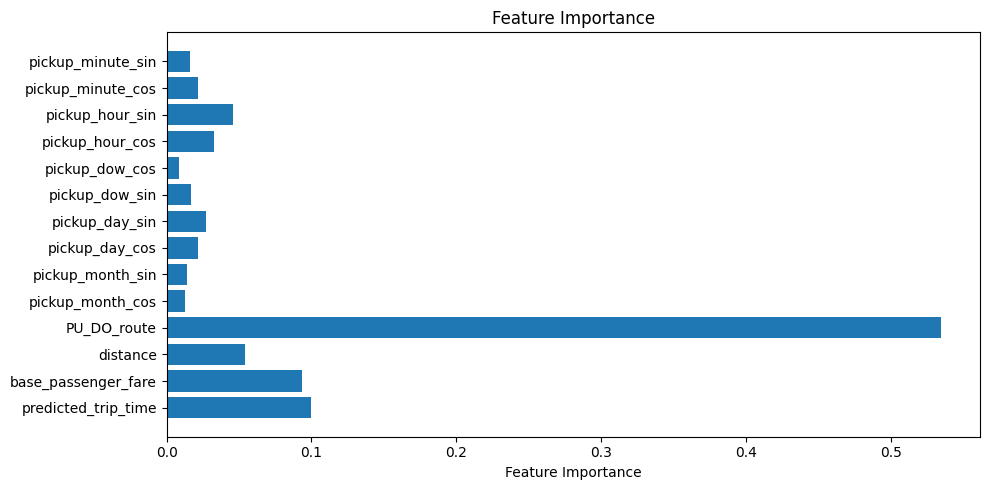

In [541]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [542]:
avg_train_acc = np.mean(zone_train_accuracies)
avg_test_acc = np.mean(zone_test_accuracies)

print(f"\n Average Train Accuracy Across {len(zone_train_accuracies)} Zones: {avg_train_acc:.4f}")
print(f" Average Test Accuracy Across {len(zone_test_accuracies)} Zones: {avg_test_acc:.4f}")



 Average Train Accuracy Across 71 Zones: 0.4986
 Average Test Accuracy Across 71 Zones: 0.4534


In [543]:
geo_test_df_clipped.columns

Index(['request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'pickup_zone', 'dropoff_zone',
       'pickup_year', 'pickup_month', 'pickup_month_cos', 'pickup_month_sin',
       'pickup_day', 'days_in_month', 'pickup_day_cos', 'pickup_day_sin',
       'pickup_dayofweek', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour',
       'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute',
       'pickup_minute_cos', 'pickup_minute_sin'],
      dtype='object')

In [544]:
df_2015.columns

Index(['request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'pickup_zone', 'dropoff_zone',
       'pickup_year', 'pickup_month', 'pickup_month_cos', 'pickup_month_sin',
       'pickup_day', 'days_in_month', 'pickup_day_cos', 'pickup_day_sin',
       'pickup_dayofweek', 'pickup_dow_sin', 'pickup_dow_cos', 'pickup_hour',
       'pickup_hour_cos', 'pickup_hour_sin', 'pickup_minute',
       'pickup_minute_cos', 'pickup_minute_sin', 'PU_DO_route', 'distance',
       'predicted_trip_time', 'predicted_subzone'],
      dtype='object')

In [545]:
df_2015 = geo_test_df_clipped.copy()
df_2015['PU_DO_route'] = df_2015['PULocationID'].astype(str) + '_' + df_2015['DOLocationID'].astype(str)
df_2015['distance'] = df_2015['trip_miles']
df_2015['predicted_trip_time'] = df_2015['trip_time']

In [546]:
print(f"subset rows: {len(subset.index)}, predictions: {len(pred_subzones)}")


subset rows: 1, predictions: 8165


In [548]:
from tqdm import tqdm

df_2015['predicted_subzone'] = None

for zone_id, model in tqdm(zone_models.items()):

    subset = df_2015[df_2015['DOLocationID'] == zone_id]

    if subset.empty:
        continue

    missing = [f for f in final_features if f not in subset.columns]
    if missing:

      subzone_preds = model.predict(X_2015)


      pred_subzones = [f"{zone_id}_{idx}" for idx in subzone_preds]


      pred_index = X_2015.index[:len(pred_subzones)]


      df_2015.loc[pred_index, 'predicted_subzone'] = pred_subzones

100%|██████████| 71/71 [00:01<00:00, 51.09it/s]


In [549]:
df_2015

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,...,pickup_hour,pickup_hour_cos,pickup_hour_sin,pickup_minute,pickup_minute_cos,pickup_minute_sin,PU_DO_route,distance,predicted_trip_time,predicted_subzone
394658,2024-04-02 18:33:05,2024-04-02 18:42:31,2024-04-02 18:42:51,2024-04-02 18:55:04,246,234,1.49,733,10.22,0.0,...,18,-1.000000,-1.836970e-16,42,-0.951057,-0.309017,246_234,1.49,733,None
2327577,2024-04-09 23:35:19,2024-04-09 23:45:51,2024-04-09 23:46:48,2024-04-09 23:53:13,164,100,0.85,385,14.52,0.0,...,23,-0.258819,9.659258e-01,46,-0.994522,0.104528,164_100,0.85,385,None
639206,2024-04-03 15:47:44,2024-04-03 15:51:13,2024-04-03 15:51:25,2024-04-03 16:05:00,161,237,1.18,815,15.36,0.0,...,15,-0.707107,-7.071068e-01,51,-0.809017,0.587785,161_237,1.18,815,None
2000864,2024-04-08 14:52:08,2024-04-08 14:54:54,2024-04-08 14:56:21,2024-04-08 15:01:24,170,137,0.50,303,8.25,0.0,...,14,-0.500000,-8.660254e-01,56,-0.406737,0.913545,170_137,0.50,303,None
629998,2024-04-03 14:55:45,2024-04-03 15:00:14,2024-04-03 15:00:49,2024-04-03 15:16:28,231,211,1.85,939,26.53,0.0,...,15,-0.707107,-7.071068e-01,0,0.000000,1.000000,231_211,1.85,939,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134248,2025-01-31 02:03:01,2025-01-31 02:06:23,2025-01-31 02:06:31,2025-01-31 02:13:26,186,125,2.23,415,15.39,0.0,...,2,0.500000,8.660254e-01,6,0.587785,0.809017,186_125,2.23,415,None
1099635,2025-01-30 22:22:07,2025-01-30 22:26:12,2025-01-30 22:26:21,2025-01-30 22:45:22,234,236,3.80,1141,48.41,0.0,...,22,-0.500000,8.660254e-01,26,0.406737,-0.913545,234_236,3.80,1141,None
343187,2025-01-27 22:00:10,2025-01-27 22:01:10,2025-01-27 22:01:37,2025-01-27 22:10:42,88,4,3.66,545,12.15,0.0,...,22,-0.500000,8.660254e-01,1,0.104528,0.994522,88_4,3.66,545,None
1123598,2025-01-31 00:29:54,2025-01-31 00:31:10,2025-01-31 00:33:11,2025-01-31 00:41:09,161,137,1.15,478,10.96,0.0,...,0,0.000000,1.000000e+00,33,-0.309017,-0.951057,161_137,1.15,478,None


# Pricing Model (Not Complete)

In [460]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
import mlflow
import mlflow.tensorflow
import tensorflow as tf
import os

In [461]:
mlflow.tensorflow.autolog()

In [462]:
model = Sequential()
model.add(Dense(40, input_dim=28, activation='relu'))
model.add(Dense(1, activation ='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [463]:
opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 )
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics = ['root_mean_squared_error','mean_absolute_error'])

In [464]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 40)             │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [465]:
X = df_base_model_1.drop(columns=['total_fare'], axis=1)
y = df_base_model_1['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

NameError: name 'df_base_model_1' is not defined

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='val_loss', min_delta = 1e-4, patience = 10)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=.2, callbacks=[trainCallback])

In [ ]:
!ls mlruns/0/*/artifacts/model

In [ ]:
!ls mlruns/0

In [ ]:
!ls mlruns/0/cb7dd86594ef49cead4926f6492d1a47/metrics

In [ ]:
model.save('/content/drive/MyDrive/baseline_model_3.keras')

In [ ]:
y_pred = model.predict(X_test).flatten()

In [ ]:
plt.scatter(y_test[:500], y_pred[:500], alpha=0.2)
plt.plot([0,150],[0,150], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Uber Fares")
plt.xlim(0,150)

In [ ]:
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals (Prediction Error)")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Count")
plt.xlim(-50, 50)
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Mean Absolute Error Over Epochs")
plt.legend()
plt.show()


In [ ]:
df_preds = X_test.copy()
df_preds['actual'] = y_test
df_preds['predicted'] = y_pred
df_preds['absolute_error'] = np.abs(y_pred - y_test)
zone_errors = df_preds.groupby('PULocationID')['absolute_error'].mean().sort_values(ascending=False)[:10]
zone_errors.plot(kind='barh', figsize=(10,8), title="Avg Fare Prediction Error by Pickup Zone")
plt.xlabel("Mean Absolute Error ($)")
plt.show()
